## Mohith Edara

The Dataset applied is IPL Matches 2008-2020 Dataset.

Here I will be analyzing the factors and patterns that helps team to win matches by using libraries of Python such as Numpy and Pandas for data manipulation and for visualization I have used Matplotlib, Seaborn and Plotly.

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Reading the dataset

In [2]:
df=pd.read_csv('IPL Matches 2008-2020.csv')
df

id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                              Wankhede Stadium              0   
4                                  Eden Gardens              0   
..                                          ...            ...   
811         Dubai International Cricket Stadium              0   
812         Dubai International Cricket Stadium              0   
813                        Sheikh Zayed Stadium              0   
814                        Sheikh Zayed Stadium              0   
815         Dubai International Cricket Stadium              0   

                           team1                        team2  \
0    Royal Challengers Bangalore        Kolkata Knight Riders   
1                Kings XI Punjab          Chennai Super Kings   
2               Delhi Daredevils             Rajasthan Royals   
3                 Mumbai Indians  Royal Challengers Bangalore   
4          Kolkata Knight Riders              Deccan Chargers   
..                           ...                          ...   
811  Royal Challengers Bangalore               Mumbai Indians   
812               Mumbai Indians               Delhi Capitals   
813  Royal Challengers Bangalore          Sunrisers Hyderabad   
814               Delhi Capitals          Sunrisers Hyderabad   
815               Delhi Capitals               Mumbai Indians   

                     toss_winner toss_decision                       winner  \
0    Royal Challengers Bangalore         field        Kolkata Knight Riders   
1            Chennai Super Kings           bat          Chennai Super Kings   
2               Rajasthan Royals           bat             Delhi Daredevils   
3                 Mumbai Indians           bat  Royal Challengers Bangalore   
4                Deccan Chargers           bat        Kolkata Knight Riders   
..                           ...           ...                          ...   
811               Mumbai Indians         field  Royal Challengers Bangalore   
812               Delhi Capitals         field               Mumbai Indians   
813          Sunrisers Hyderabad         field          Sunrisers Hyderabad   
814               Delhi Capitals           bat               Delhi Capitals   
815               Delhi Capitals           bat               Mumbai Indians   

      result  result_margin eliminator method      umpire1         umpire2  
0       runs          140.0          N    NaN    Asad Rauf     RE Koertzen  
1       runs           33.0          N    NaN    MR Benson      SL Shastri  
2    wickets            9.0          N    NaN    Aleem Dar  GA Pratapkumar  
3    wickets            5.0          N    NaN     SJ Davis       DJ Harper  
4    wickets            5.0          N    NaN    BF Bowden     K Hariharan  
..       ...            ...        ...    ...          ...             ...  
811      tie            NaN          Y    NaN  Nitin Menon      PR Reiffel  
812     runs           57.0          N    NaN  CB Gaffaney     Nitin Menon  
813  wickets            6.0          N    NaN   PR Reiffel          S Ravi  
814     runs           17.0          N    Na

Knowing the Datatypes and Info of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [4]:
#number of rows and columns of a given DataFrame
df.shape

(816, 17)

In [5]:
# Converting the date into datetime format
df["date"] = pd.to_datetime(df["date"])

In [6]:
# Creating new column year the dates
df["Year"] = df["date"].dt.year

In [7]:
# Creating new column month the dates
df["Month"] = df["date"].dt.month

In [8]:
# Creating new column day the dates
df["Day"] = df["date"].dt.day

In [9]:
# Creating new column weekday the dates
df["Week"] = df["date"].dt.weekday

1) Data Pre-Processing

Handling Missing Values

In [10]:
df.isnull().sum() 

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
Year                 0
Month                0
Day                  0
Week                 0
dtype: int64

In [11]:
numerical=[i for i in df.columns if df[i].dtype!='O']
numerical

['id',
 'date',
 'neutral_venue',
 'result_margin',
 'Year',
 'Month',
 'Day',
 'Week']

In [12]:
categorical=[i for i in df.columns if df[i].dtype=='O']
categorical

['city',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'eliminator',
 'method',
 'umpire1',
 'umpire2']

Checking for the NULL values

In [13]:
df[df["city"].isnull()]

id city       date player_of_match  \
399  729281  NaN 2014-04-17       YS Chahal   
402  729287  NaN 2014-04-19        PA Patel   
403  729289  NaN 2014-04-19       JP Duminy   
404  729291  NaN 2014-04-20      GJ Maxwell   
406  729295  NaN 2014-04-22      GJ Maxwell   
407  729297  NaN 2014-04-23       RA Jadeja   
408  729299  NaN 2014-04-24         CA Lynn   
409  729301  NaN 2014-04-25        AJ Finch   
410  729303  NaN 2014-04-25       MM Sharma   
413  729309  NaN 2014-04-27         M Vijay   
414  729311  NaN 2014-04-27        DR Smith   
415  729313  NaN 2014-04-28  Sandeep Sharma   
417  729317  NaN 2014-04-30         B Kumar   

                                   venue  neutral_venue  \
399              Sharjah Cricket Stadium              1   
402  Dubai International Cricket Stadium              1   
403  Dubai International Cricket Stadium              1   
404              Sharjah Cricket Stadium              1   
406              Sharjah Cricket Stadium              1   
407  Dubai International Cricket Stadium              1   
408              Sharjah Cricket Stadium              1   
409  Dubai International Cricket Stadium              1   
410  Dubai International Cricket Stadium              1   
413              Sharjah Cricket Stadium              1   
414              Sharjah Cricket Stadium              1   
415  Dubai International Cricket Stadium              1   
417  Dubai International Cricket Stadium              1   

                           team1                        team2  \
399             Delhi Daredevils  Royal Challengers Bangalore   
402  Royal Challengers Bangalore               Mumbai Indians   
403        Kolkata Knight Riders             Delhi Daredevils   
404             Rajasthan Royals              Kings XI Punjab   
406              Kings XI Punjab          Sunrisers Hyderabad   
407             Rajasthan Royals          Chennai Super Kings   
408  Royal Challengers Bangalore        Kolkata Knight Riders   
409          Sunrisers Hyderabad             Delhi Daredevils   
410          Chennai Super Kings               Mumbai Indians   
413             Delhi Daredevils               Mumbai Indians   
414          Sunrisers Hyderabad          Chennai Super Kings   
415              Kings XI Punjab  Royal Challengers Bangalore   
417               Mumbai Indians          Sunrisers Hyderabad   

                     toss_winner toss_decision  ...   result result_margin  \
399  Royal Challengers Bangalore         field  ...  wickets           8.0   
402  Royal Challengers Bangalore         field  ...  wickets           7.0   
403        Kolkata Knight Riders           bat  ...  wickets           4.0   
404              Kings XI Punjab         field  ...  wickets           7.0   
406          Sunrisers Hyderabad         field  ...     runs          72.0   
407             Rajasthan Royals         field  ...     runs           7.0   
408  Royal Challengers Bangalore         field  ...     runs           2.0   
409          Sunrisers Hyderabad           bat  ...     runs           4.0   
410               Mumbai Indians           bat  ...  wickets           7.0   
413               Mumbai Indians           bat  ...  wickets           6.0   
414          Sunrisers Hyderabad           bat  ...  wickets           5.0   
415              Kings XI Punjab         field  ...  wickets           5.0   
417               Mumbai Indians         field  ...     runs          15.0   

     eliminator method          umpire1         umpire2  Year  Month  Day  \
399           N    NaN        Aleem Dar          S Ravi  2014      4   17   
402           N    NaN        Aleem Dar    AK Chaudhary  2014      4   19   
403           N    NaN        Aleem Dar     VA Kulkarni  2014      4   19   
404           N    NaN        BF Bowden       M Erasmus  2014      4   20   
406           N    NaN        M Erasmus          S Ravi  2014      4   22   
407           N    NaN  HDPK Dharmasena  RK Illingworth  

Replacing and Filling the NULL values

In [14]:
# Replacing the null values of city by Sharjah where venue is Sharjah Cricket Stadium
df.loc[(df['venue'] == 'Sharjah Cricket Stadium') & (df['city'].isnull()), 'city'] = 'Sharjah'

In [15]:
# Replacing the null values of city by Dubai where venue is Dubai Cricket Stadium
df.loc[(df['venue'] == 'Dubai International Cricket Stadium') & (df['city'].isnull()), 'city'] = 'Dubai'

In [16]:
df["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

In [17]:
# Get the null values present in the column player_of_match
df[df["player_of_match"].isnull()]

id       city       date player_of_match                  venue  \
241   501265      Delhi 2011-05-21             NaN       Feroz Shah Kotla   
486   829763  Bangalore 2015-04-29             NaN  M Chinnaswamy Stadium   
511   829813  Bangalore 2015-05-17             NaN  M Chinnaswamy Stadium   
744  1178424  Bengaluru 2019-04-30             NaN  M.Chinnaswamy Stadium   

     neutral_venue                        team1             team2  \
241              0             Delhi Daredevils     Pune Warriors   
486              0  Royal Challengers Bangalore  Rajasthan Royals   
511              0  Royal Challengers Bangalore  Delhi Daredevils   
744              0  Royal Challengers Bangalore  Rajasthan Royals   

                     toss_winner toss_decision  ... result result_margin  \
241             Delhi Daredevils           bat  ...    NaN           NaN   
486             Rajasthan Royals         field  ...    NaN           NaN   
511  Royal Challengers Bangalore         field  ...    NaN           NaN   
744             Rajasthan Royals         field  ...    NaN           NaN   

     eliminator method          umpire1       umpire2  Year  Month  Day  Week  
241         NaN    NaN        SS Hazare     RJ Tucker  2011      5   21     5  
486         NaN    NaN        JD Cloete     PG Pathak  2015      4   29     2  
511         NaN    NaN  HDPK Dharmasena  K Srinivasan  2015      5   17     6  
744         NaN    NaN        UV Gandhe      NJ Llong  2019      4   30     1  

[4 rows x 21 columns]

Above 4 rows don't have values for player_of_match, winner, result, result_marginso it is better to drop these 4 records

In [18]:

df.drop([241,486,511,744], inplace=True)

Checking null values in the column result_margin

In [19]:

df[df["result_margin"].isnull()]

id       city       date player_of_match  \
66    392190  Cape Town 2009-04-23       YK Pathan   
130   419121    Chennai 2010-03-21        J Theron   
328   598004  Hyderabad 2013-04-07       GH Vihari   
341   598017  Bangalore 2013-04-16         V Kohli   
416   729315  Abu Dhabi 2014-04-29     JP Faulkner   
476   829741  Ahmedabad 2015-04-21        SE Marsh   
610  1082625     Rajkot 2017-04-29       KH Pandya   
705  1175365      Delhi 2019-03-30         PP Shaw   
746  1178426     Mumbai 2019-05-02       JJ Bumrah   
757  1216493      Dubai 2020-09-20      MP Stoinis   
776  1216512  Abu Dhabi 2020-10-18     LH Ferguson   
781  1216517      Dubai 2020-10-18        KL Rahul   
811  1216547      Dubai 2020-09-28  AB de Villiers   

                                         venue  neutral_venue  \
66                                    Newlands              1   
130            MA Chidambaram Stadium, Chepauk              0   
328  Rajiv Gandhi International Stadium, Uppal              0   
341                      M Chinnaswamy Stadium              0   
416                       Sheikh Zayed Stadium              1   
476               Sardar Patel Stadium, Motera              0   
610     Saurashtra Cricket Association Stadium              0   
705                           Feroz Shah Kotla              0   
746                           Wankhede Stadium              0   
757        Dubai International Cricket Stadium              0   
776                       Sheikh Zayed Stadium              0   
781        Dubai International Cricket Stadium              0   
811        Dubai International Cricket Stadium              0   

                           team1                        team2  \
66         Kolkata Knight Riders             Rajasthan Royals   
130          Chennai Super Kings              Kings XI Punjab   
328          Sunrisers Hyderabad  Royal Challengers Bangalore   
341  Royal Challengers Bangalore             Delhi Daredevils   
416        Kolkata Knight Riders             Rajasthan Royals   
476             Rajasthan Royals              Kings XI Punjab   
610                Gujarat Lions               Mumbai Indians   
705               Delhi Capitals        Kolkata Knight Riders   
746               Mumbai Indians          Sunrisers Hyderabad   
757               Delhi Capitals              Kings XI Punjab   
776        Kolkata Knight Riders          Sunrisers Hyderabad   
781               Mumbai Indians              Kings XI Punjab   
811  Royal Challengers Bangalore               Mumbai Indians   

                     toss_winner toss_decision  ... result result_margin  \
66         Kolkata Knight Riders         field  ...    tie           NaN   
130          Chennai Super Kings         field  ...    tie           NaN   
328  Royal Challengers Bangalore           bat  ...    tie           NaN   
341  Royal Challengers Bangalore         field  ...    tie           NaN   
416             Rajasthan Royals           bat  ...    tie           NaN   
476              Kings XI Punjab         field  ...    tie           NaN   
610                Gujarat Lions           bat  ...    tie           NaN   
705               Delhi Capitals         field  ...    tie           NaN   
746               Mumbai Indians           bat  ...    tie           NaN   
757              Kings XI Punjab         field  ...    tie           NaN   
776          Sunrisers Hyderabad         field  ...    tie           NaN   
781               Mumbai Indians           bat  ...    tie           NaN   
811               Mumbai Indians         field  ...    tie           NaN   

     eliminator method       umpire1       umpire2  Year  Month  Day  Week  
66            Y    NaN     MR Benson     M Erasmus  2009      4   23     3  
130           Y    NaN   K Hariharan     DJ Harper  2010      3   21     6  
328           Y    NaN  AK Chaudhary        S Ravi  2013      4    7     6  
341           Y    NaN     M Erasmus   VA Kulkarni  2013  

In [20]:
# Replacing the null values of result_margin column by 0
df["result_margin"].fillna(0, inplace = True)

In [21]:
#checking the unique type of values in method column
df["method"].unique()

array([nan, 'D/L'], dtype=object)

In [22]:
# Replacing the null values of method column by "usual_win"
df["method"].fillna("Usual_win", inplace = True)

In [23]:
#checking for any more missing values are present
df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
Year               0
Month              0
Day                0
Week               0
dtype: int64

From the above, we can conclude that no NULL values are there in the Dataset. 

Checking for the Duplicates

In [24]:

# Check for duplicate rows based on all columns
duplicates = df.duplicated()

print("Number of duplicates:", duplicates.sum())



Number of duplicates: 0


2) EDA

In [25]:
# Total matches played 
print('Total matches played =',(df["id"].count()))

Total matches played = 812


In [26]:
# Total no. of seasons
df.Year.nunique()

13

In [27]:
#Adding new column
df['Season'] = df['Year']

In [28]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Year',
       'Month', 'Day', 'Week', 'Season'],
      dtype='object')

In [29]:
# Creating the list of season number
Season_Number = []
for i in df["Year"]:
  if i == 2008:
    Season_Number.append(1)
  elif i == 2009:
    Season_Number.append(2)
  elif i == 2010:
    Season_Number.append(3)
  elif i == 2011:
    Season_Number.append(4)
  elif i == 2012:
    Season_Number.append(5)
  elif i == 2013:
    Season_Number.append(6)
  elif i == 2014:
    Season_Number.append(7)
  elif i == 2015:
    Season_Number.append(8)
  elif i == 2016:
    Season_Number.append(9)
  elif i == 2017:
    Season_Number.append(10)
  elif i == 2018:
    Season_Number.append(11)
  elif i == 2019:
    Season_Number.append(12)
  elif i == 2020:
    Season_Number.append(13)

In [30]:
df["Season_Number"] = Season_Number

Number of matches played per Season

In [31]:
#Number of matches played per Season
df.Season.value_counts().sort_values(ascending = False )


2013    76
2012    74
2011    72
2010    60
2014    60
2016    60
2018    60
2020    60
2017    59
2019    59
2008    58
2009    57
2015    57
Name: Season, dtype: int64

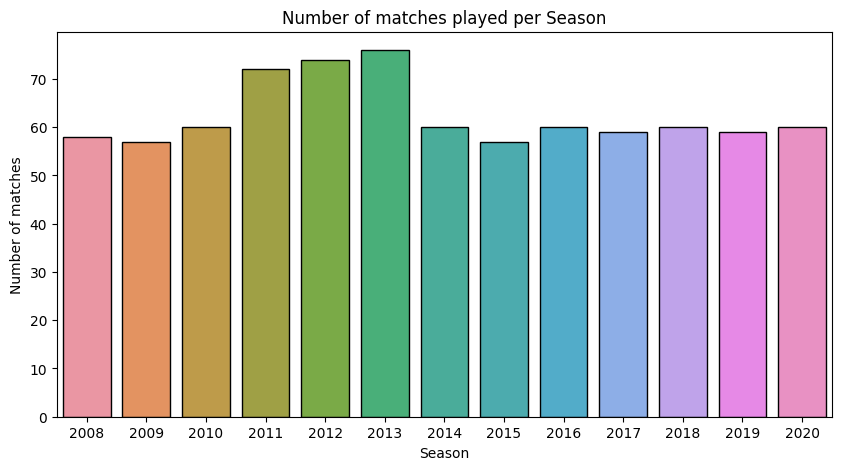

In [32]:
#BarPlot
plt.figure(figsize = (10,5))
sns.countplot(x=df["Season"], edgecolor=('black'))
plt.xlabel("Season")
plt.ylabel("Number of matches")
plt.title("Number of matches played per Season")
plt.show()

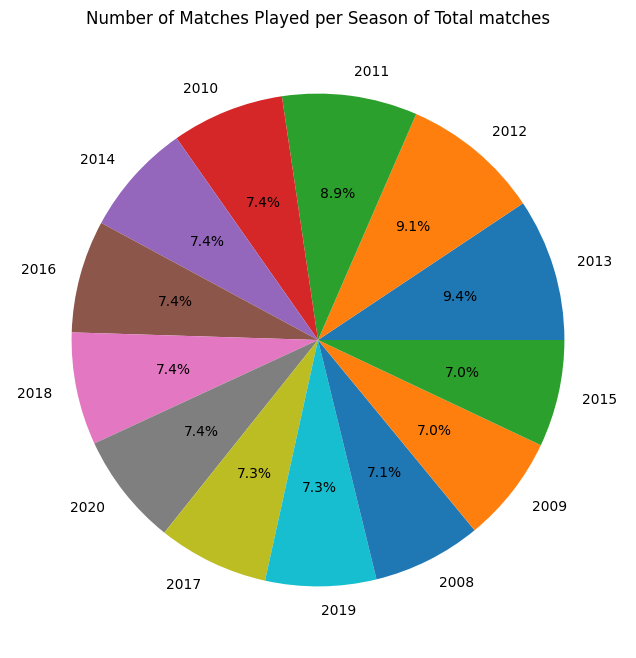

In [33]:
# Pie chart
matches_per_season = df['Season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(matches_per_season.values, labels=matches_per_season.index, autopct='%1.1f%%')
plt.title('Number of Matches Played per Season of Total matches')

plt.show()

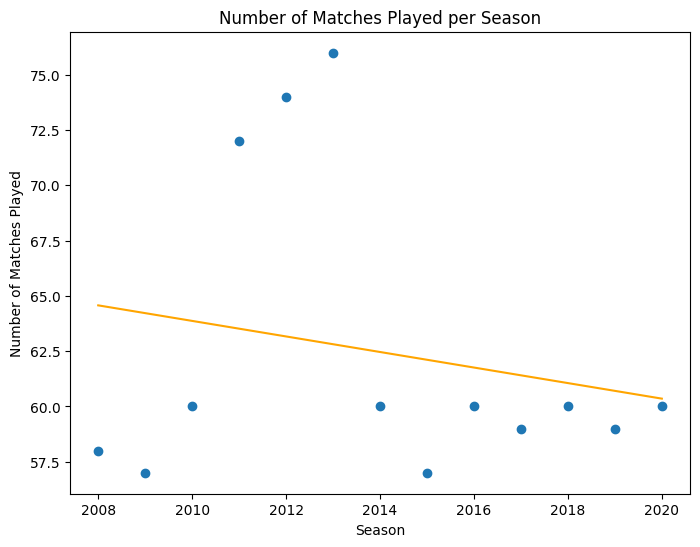

In [34]:
# Scatter plot
matches_per_season = df['Season'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.scatter(matches_per_season.index, matches_per_season.values)
plt.plot(np.unique(matches_per_season.index), np.poly1d(np.polyfit(matches_per_season.index, matches_per_season.values, 1)) (np.unique(matches_per_season.index)), color='orange')

plt.title('Number of Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')

plt.show()

Number of Matches played by each team

In [35]:
# Combine the values in columns "team1" and "team2" of the DataFrame into a list
matches = list(df["team1"]) + list(df["team2"])
matches = pd.Series(matches)

In [36]:
matches_df = pd.DataFrame(matches)

In [37]:
print('Number of mathes played by each team:')
matches.value_counts().sort_values(ascending = False)

Number of mathes played by each team:


Mumbai Indians                 203
Royal Challengers Bangalore    192
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               159
Rajasthan Royals               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

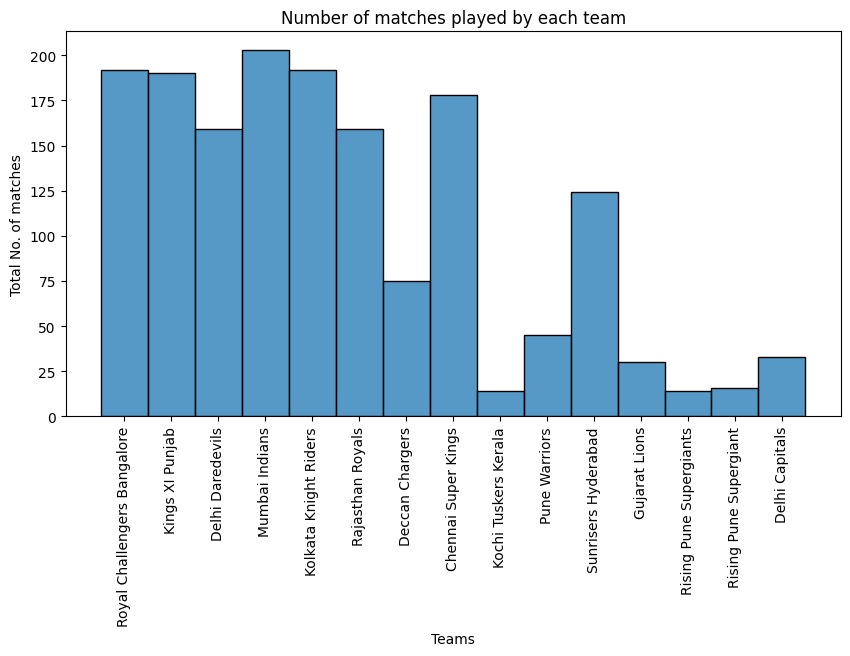

In [38]:
#Histogram
plt.figure(figsize=(10,5))
sns.histplot(matches)
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Total No. of matches")
plt.title("Number of matches played by each team")
plt.show()

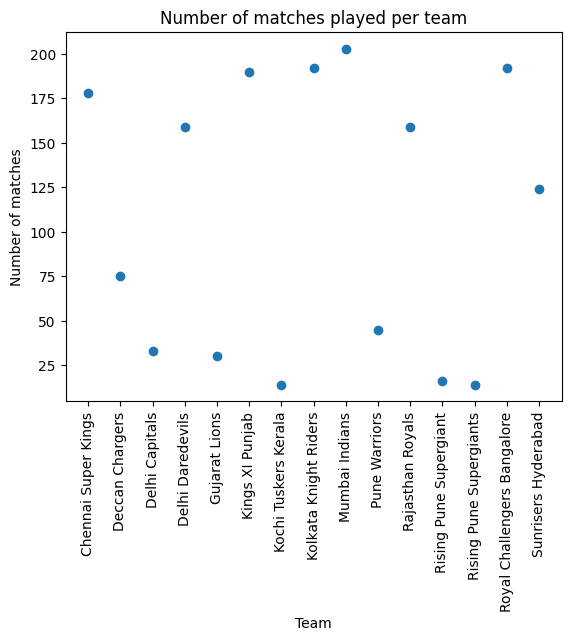

In [39]:
#Scatter Plot
matches_played = df.groupby('team1')['id'].count() + df.groupby('team2')['id'].count()
matches_played = matches_played.reset_index(name='matches')

plt.scatter(x=matches_played['team1'], y=matches_played['matches'])

plt.title('Number of matches played per team')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Number of matches')

plt.show()
 

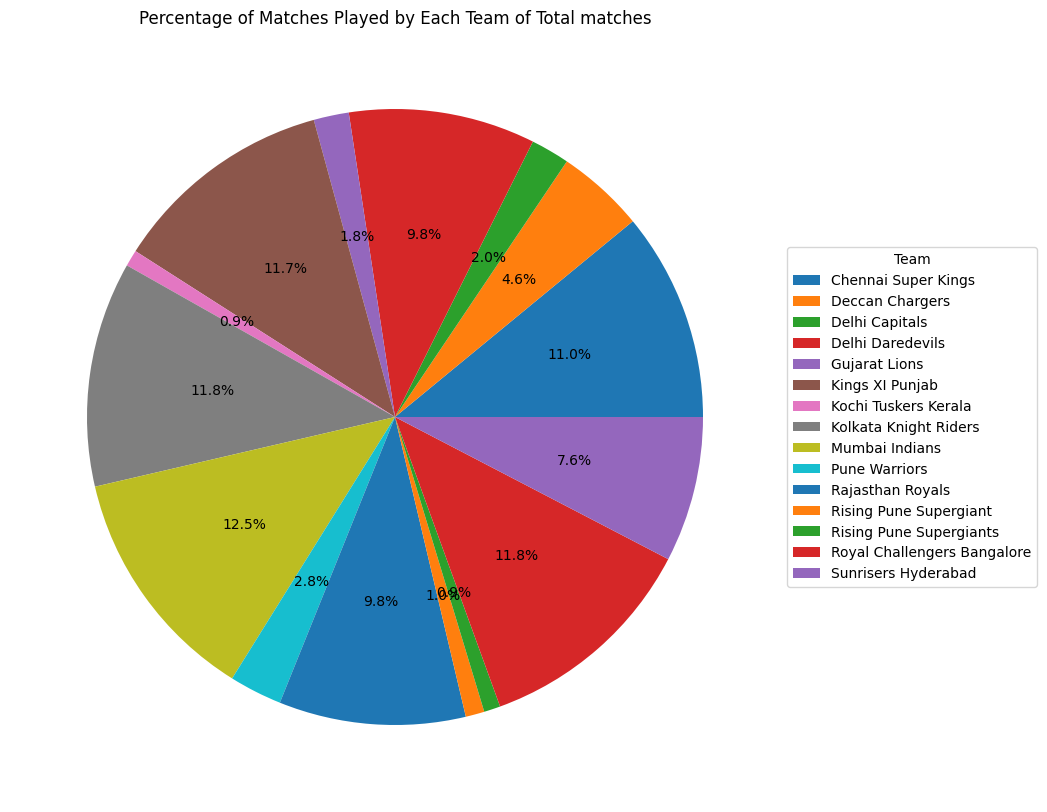

In [40]:
#Pie Chart
matches_played = df['team1'].value_counts() + df['team2'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(matches_played.values, autopct='%1.1f%%')
plt.title('Percentage of Matches Played by Each Team of Total matches')
plt.legend(title='Team', labels=matches_played.index, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


Successfull Team with most wins

In [41]:
#Succesfull Team with most Wins
df.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

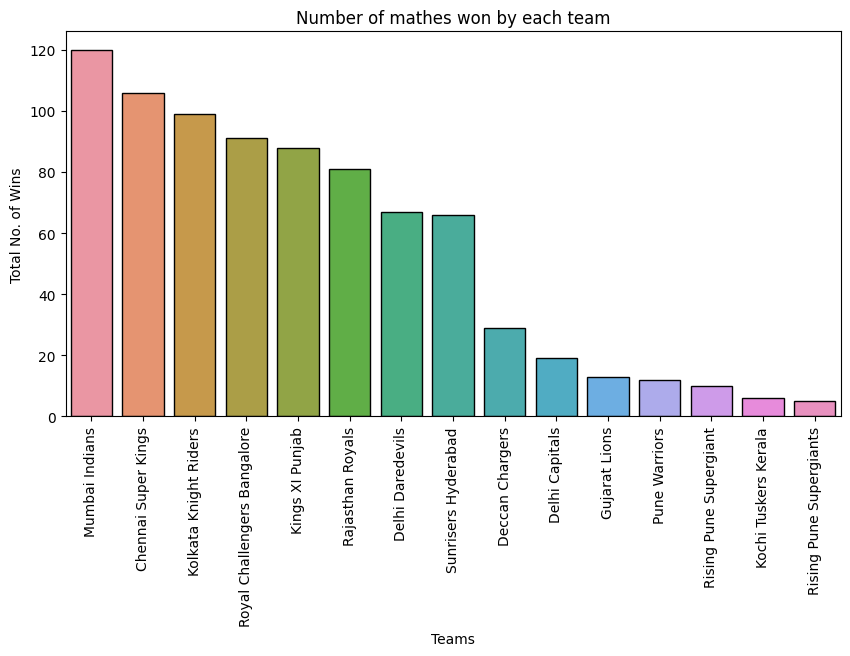

In [42]:
plt.figure(figsize=(10,5))
sns.barplot( x = df.winner.value_counts().index, y = df.winner.value_counts(), edgecolor=('black'))
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Total No. of Wins")
plt.title("Number of mathes won by each team")
plt.show()

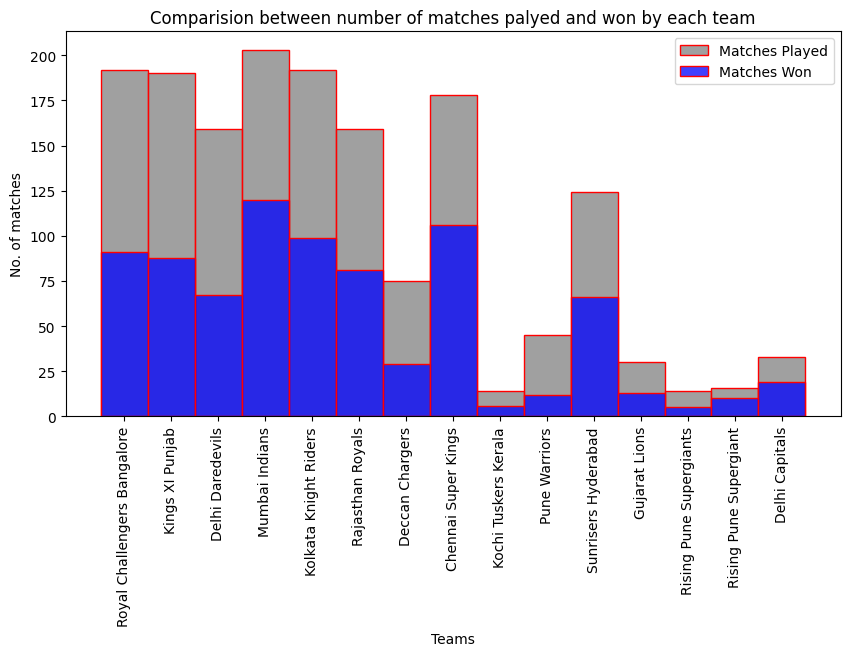

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(matches, color = "grey", edgecolor = 'red')
sns.histplot(df['winner'], color='blue', edgecolor = 'red')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams')
plt.title("Comparision between number of matches palyed and won by each team")
plt.ylabel("No. of matches")
plt.show()

Players with most player of the match awards

In [44]:
# Players with most player of the match awards
df.player_of_match.value_counts().sort_values(ascending = False)[:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

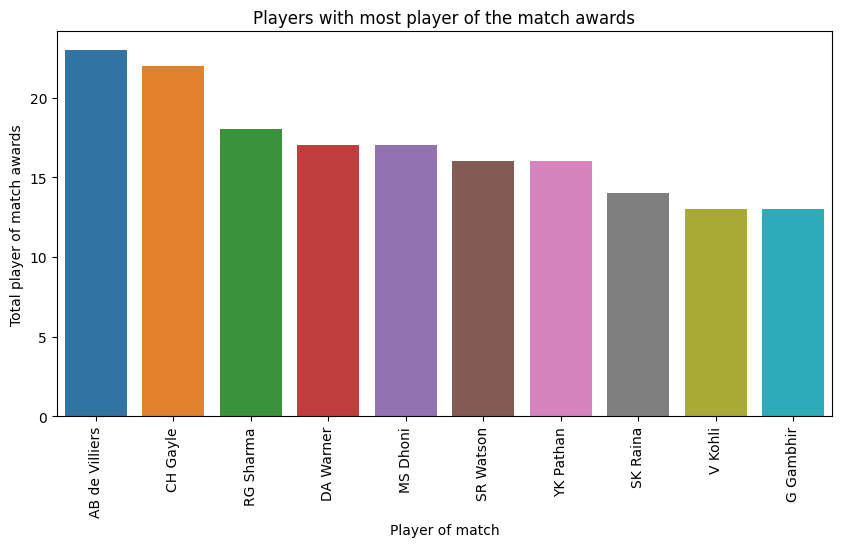

In [45]:
#BarPlot
plt.figure(figsize=(10,5))
sns.barplot( x = df["player_of_match"].value_counts(ascending = False)[:10].index, y = df["player_of_match"].value_counts(ascending = False)[:10])
plt.xticks(rotation = 90)
plt.xlabel("Player of match")
plt.ylabel("Total player of match awards")
plt.title("Players with most player of the match awards")
plt.show()

Number of matches played in each city

In [46]:
#Number of Matches played in each city
df["city"].value_counts().sort_values(ascending = False)

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Dubai              33
Abu Dhabi          29
Sharjah            18
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

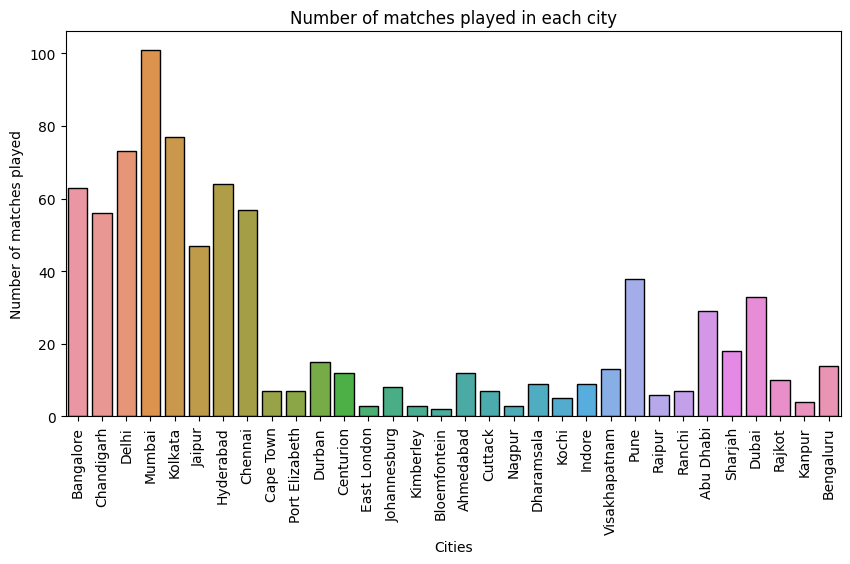

In [47]:
#BarPlot
plt.figure(figsize=(10,5))
sns.countplot(x=df["city"], edgecolor=('black')) 
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Number of matches played")
plt.title("Number of matches played in each city")
plt.show()


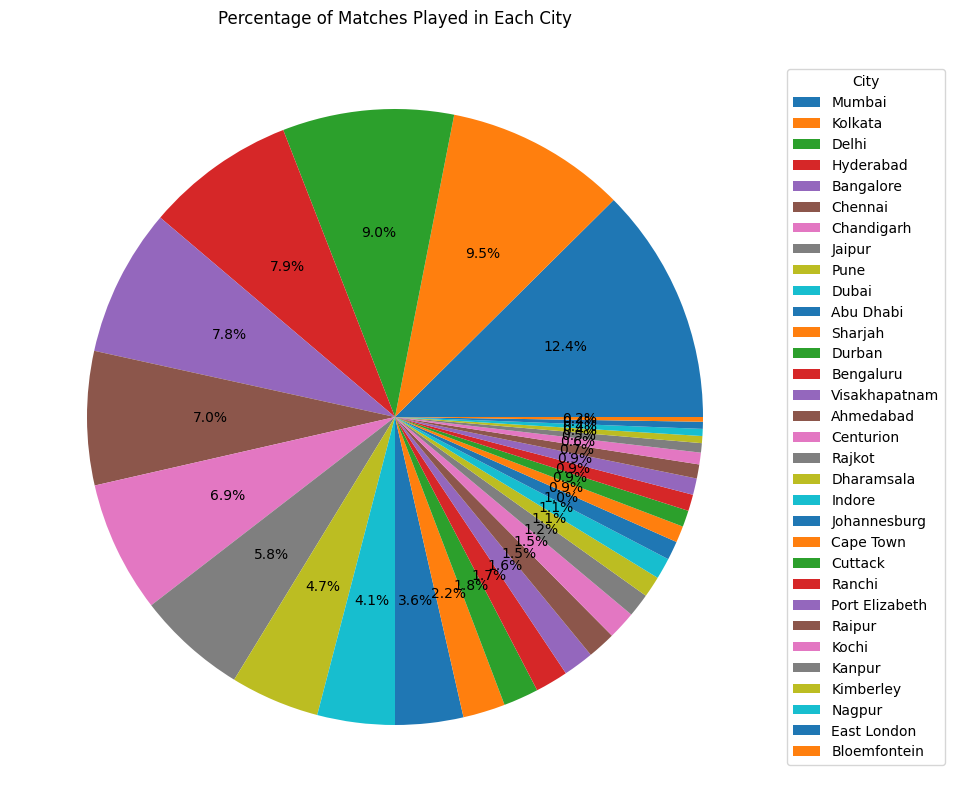

In [48]:
#Pie Chart
plt.figure(figsize=(10,10))
matches_played = df["city"].value_counts()
plt.pie(matches_played.values, autopct='%1.1f%%')
plt.title('Percentage of Matches Played in Each City')
plt.legend(title='City', labels=matches_played.index, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


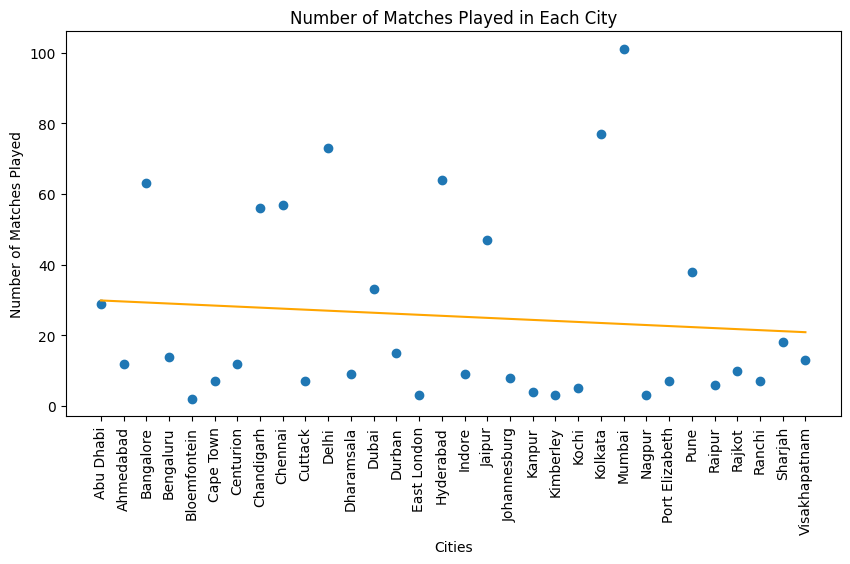

In [49]:
#scatter plot
matches_played = df.groupby('city')['id'].count()
matches_played = matches_played.reset_index(name='matches')

plt.figure(figsize=(10,5))
plt.scatter(x=matches_played['city'], y=matches_played['matches'])

plt.plot(np.unique(matches_played['city']), np.poly1d(np.polyfit(matches_played.index, matches_played['matches'], 1))(np.unique(matches_played.index)), color='orange')

plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played in Each City')
plt.show()



Teams winning proportion in each year

In [50]:
df.groupby(df["Year"])["winner"].value_counts()

Year  winner                     
2008  Rajasthan Royals               13
      Kings XI Punjab                10
      Chennai Super Kings             9
      Delhi Daredevils                7
      Mumbai Indians                  7
                                     ..
2020  Kolkata Knight Riders           7
      Royal Challengers Bangalore     7
      Chennai Super Kings             6
      Kings XI Punjab                 6
      Rajasthan Royals                6
Name: winner, Length: 108, dtype: int64

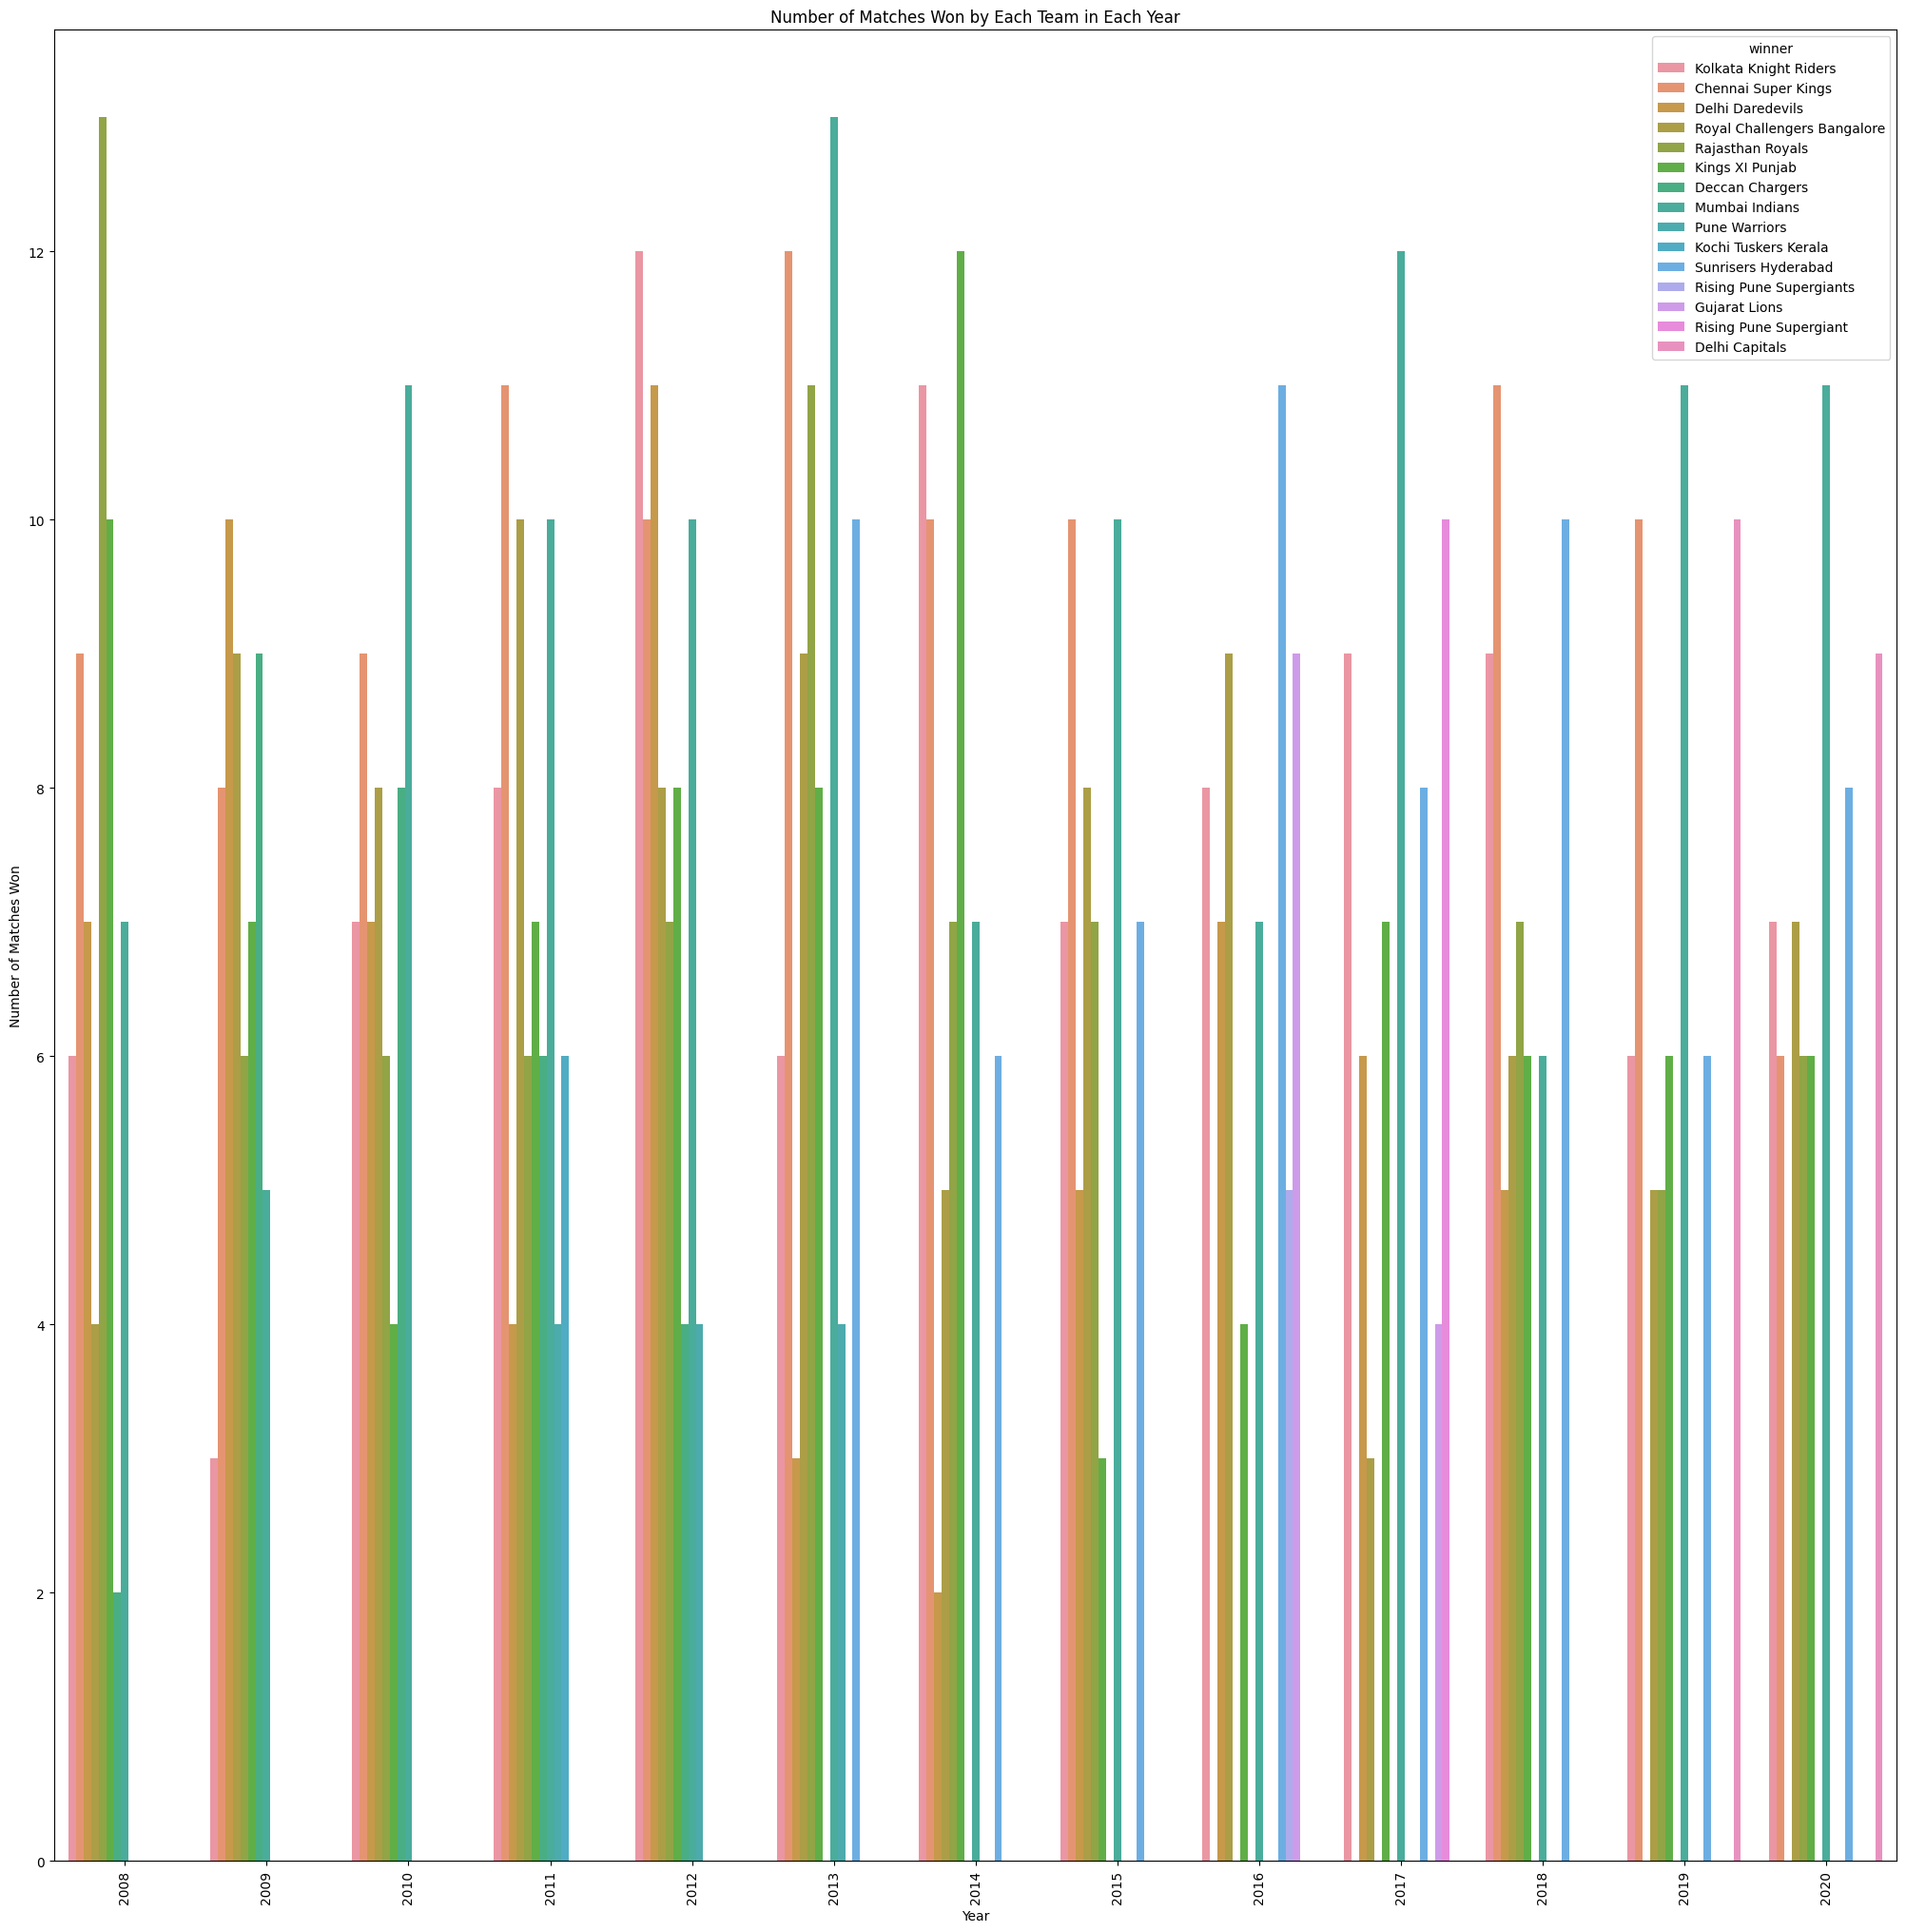

In [51]:
# BarPlot
plt.figure(figsize=(25,25))
sns.countplot(x="Year", hue="winner", data=df)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Matches Won")
plt.title("Number of Matches Won by Each Team in Each Year")
plt.show()

Year : ------------------- 2008 ------------------------


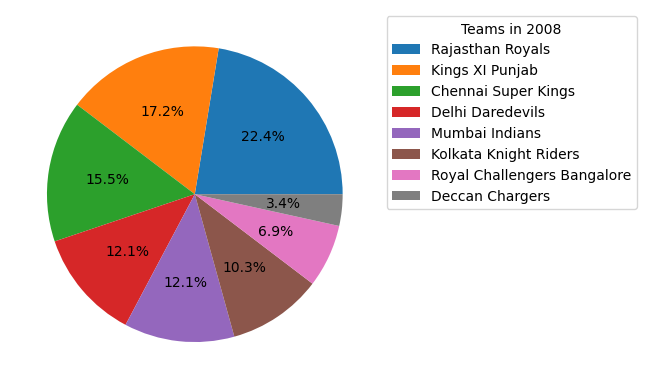

Year : ------------------- 2009 ------------------------


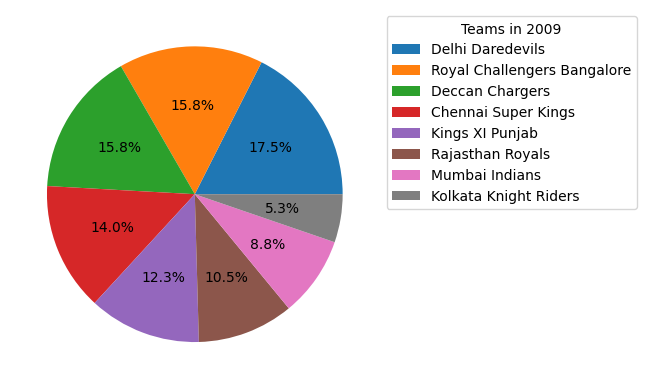

Year : ------------------- 2010 ------------------------


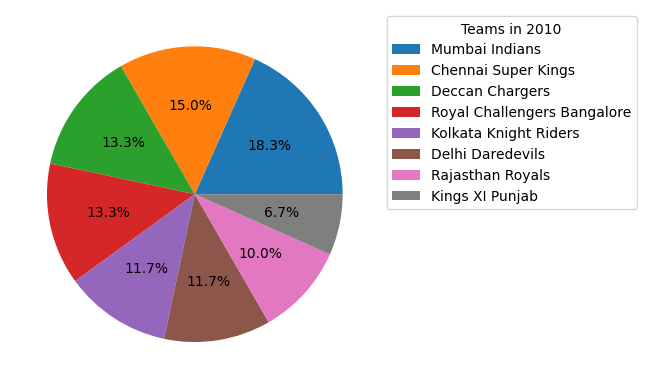

Year : ------------------- 2011 ------------------------


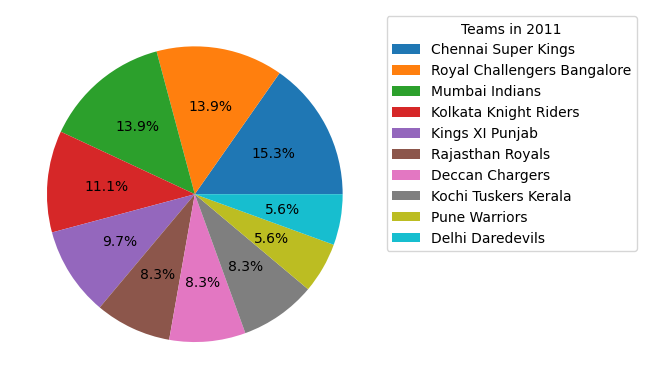

Year : ------------------- 2012 ------------------------


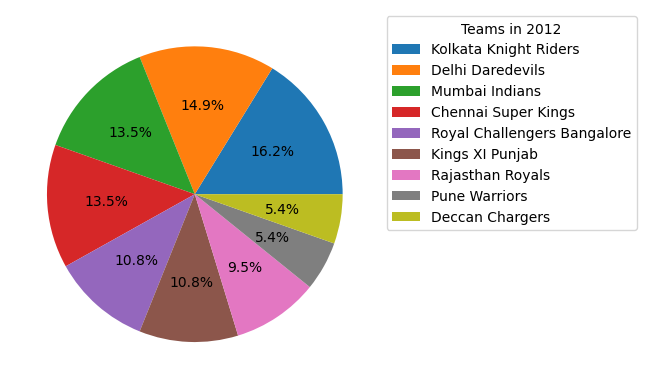

Year : ------------------- 2013 ------------------------


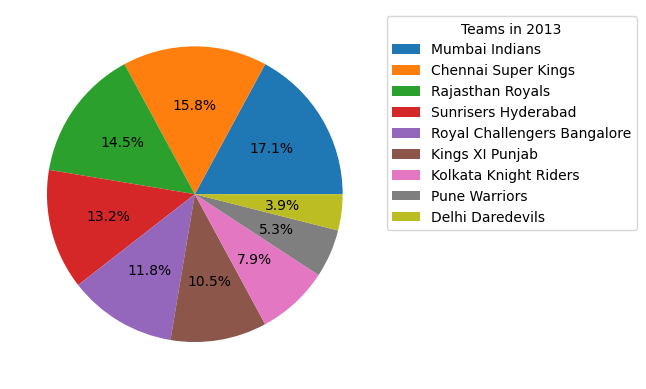

Year : ------------------- 2014 ------------------------


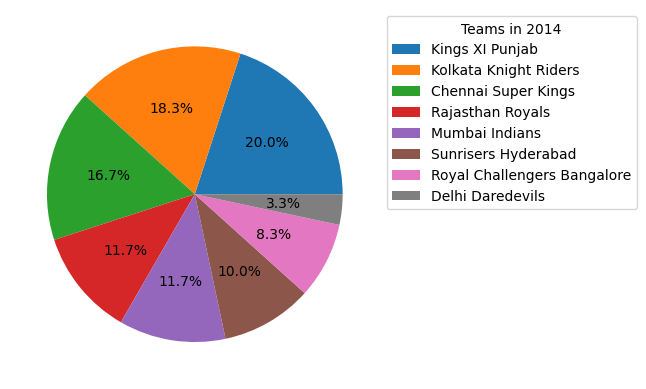

Year : ------------------- 2015 ------------------------


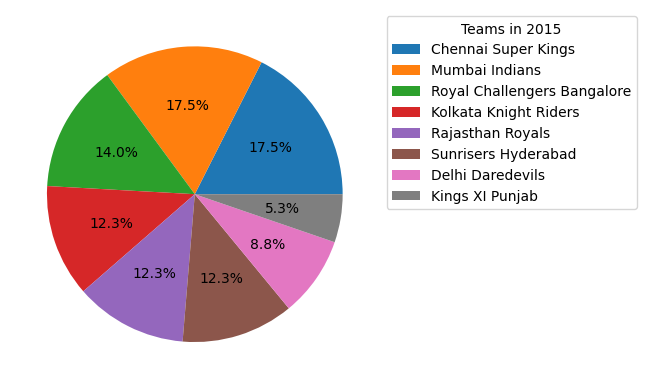

Year : ------------------- 2016 ------------------------


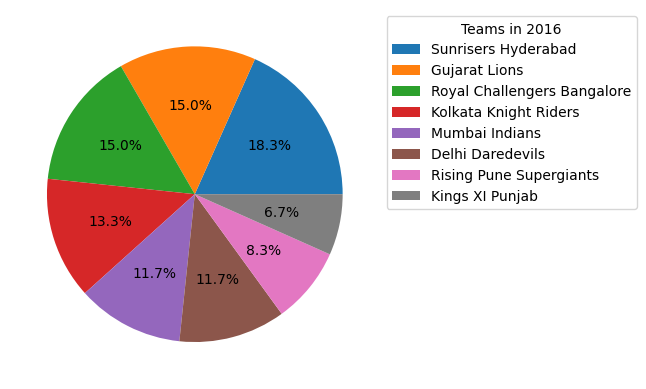

Year : ------------------- 2017 ------------------------


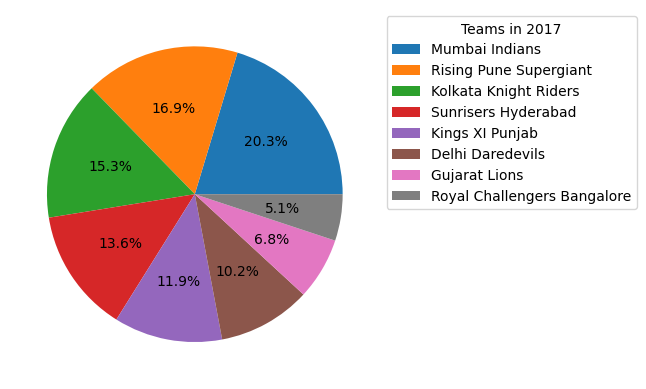

Year : ------------------- 2018 ------------------------


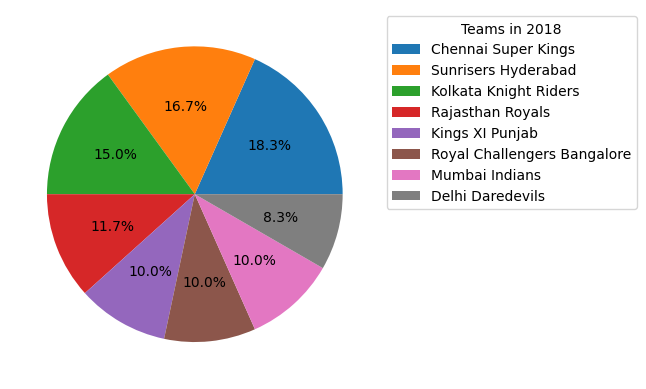

Year : ------------------- 2019 ------------------------


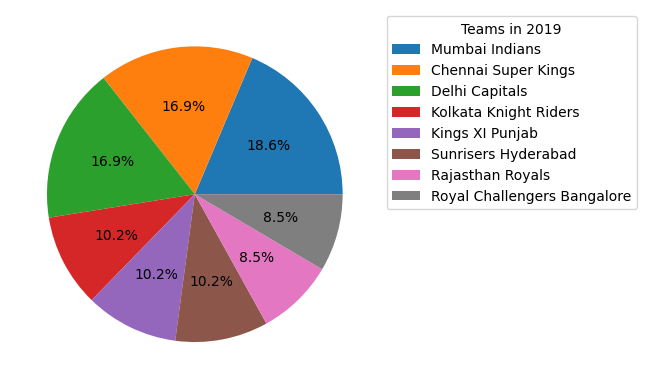

Year : ------------------- 2020 ------------------------


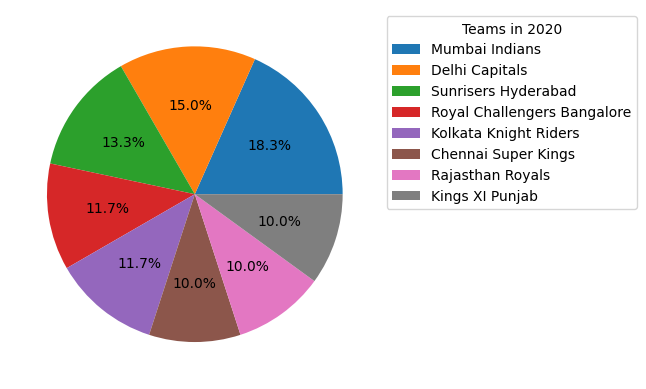

In [52]:
#PieCharts
for i in df.Year.unique():
  print("Year :", "-------------------", i,"------------------------")
  plt.pie(df[df["Year"]== i]["winner"].value_counts(), autopct = "%1.1f%%")
  plt.legend(df[df["Year"]== i]["winner"].value_counts().index, bbox_to_anchor = (1,1),title='Teams in {}'.format(i) ) # The bbox_to_anchor argument is used to specify the precise placement of the legend.
  plt.show()

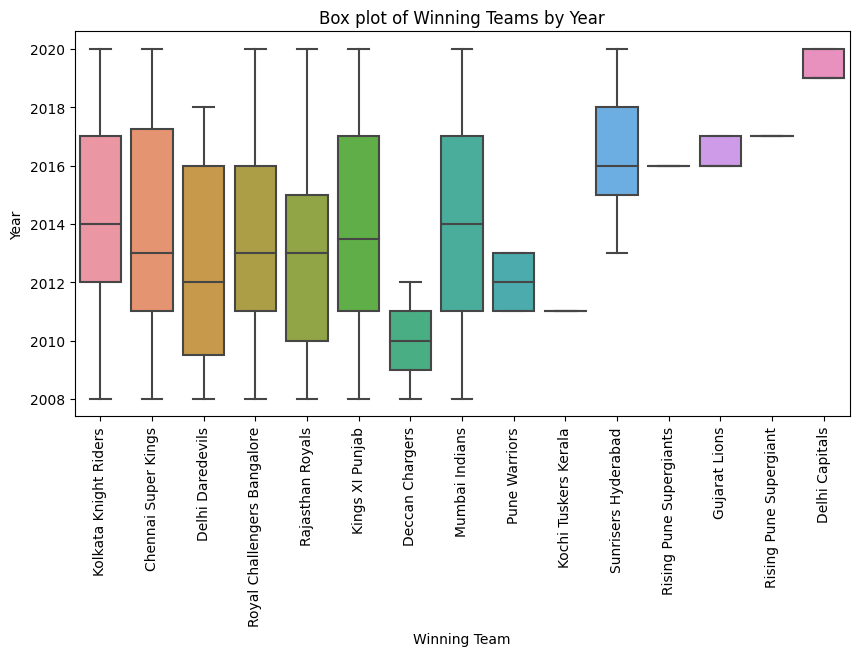

In [53]:
#Box Plot
plt.figure(figsize=(10,5))
sns.boxplot(x='winner', y='Year', data=df)
plt.xticks(rotation = 90)
plt.xlabel("Winning Team")
plt.ylabel("Year")
plt.title("Box plot of Winning Teams by Year")
plt.show()


Winning proportion of each team in all venues where they have played

Winner:  Kolkata Knight Riders


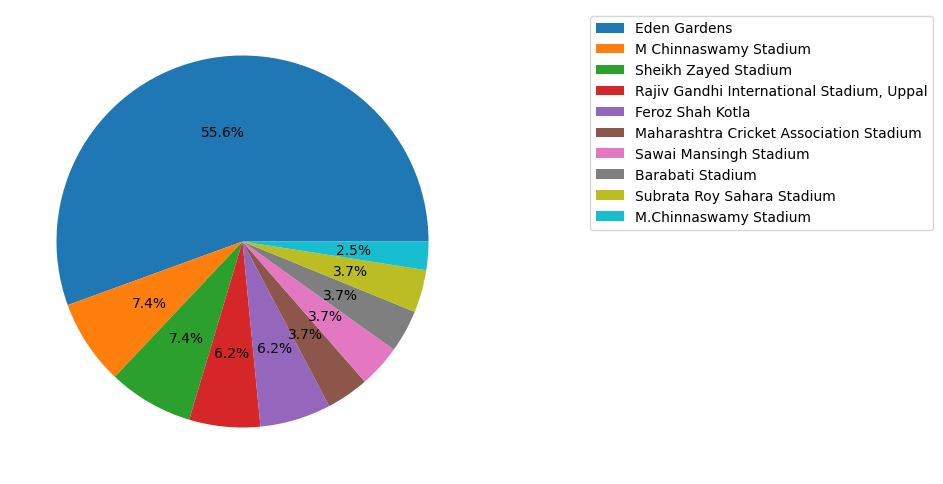

Winner:  Chennai Super Kings


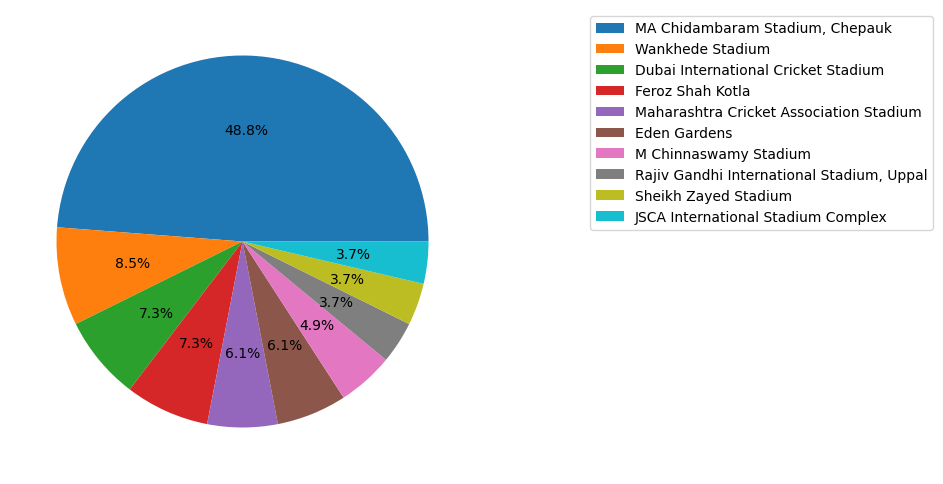

Winner:  Delhi Daredevils


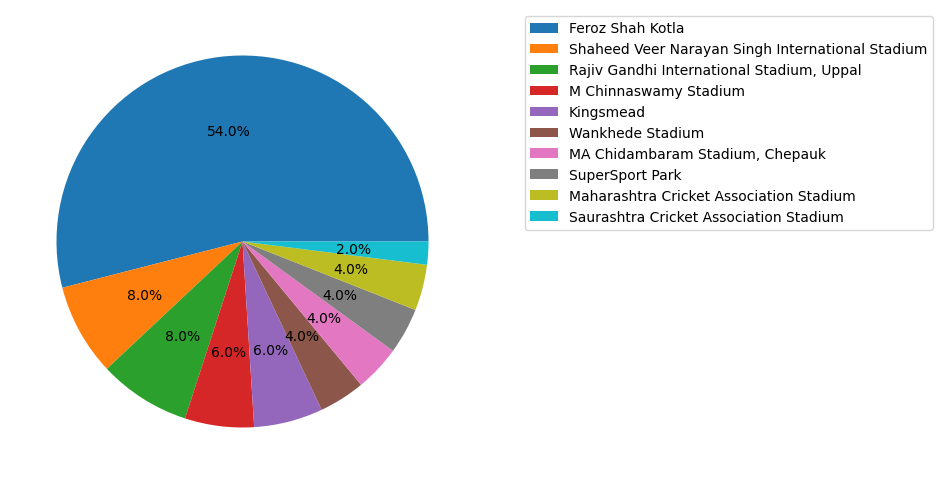

Winner:  Royal Challengers Bangalore


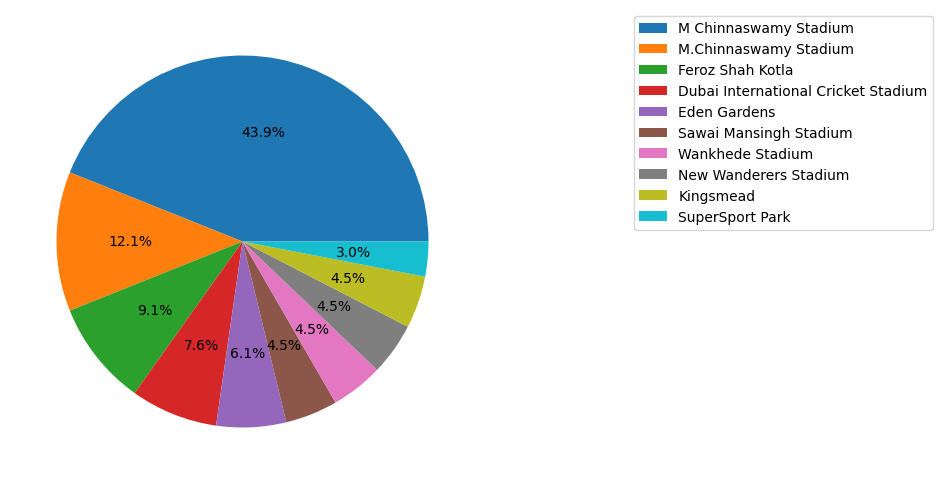

Winner:  Rajasthan Royals


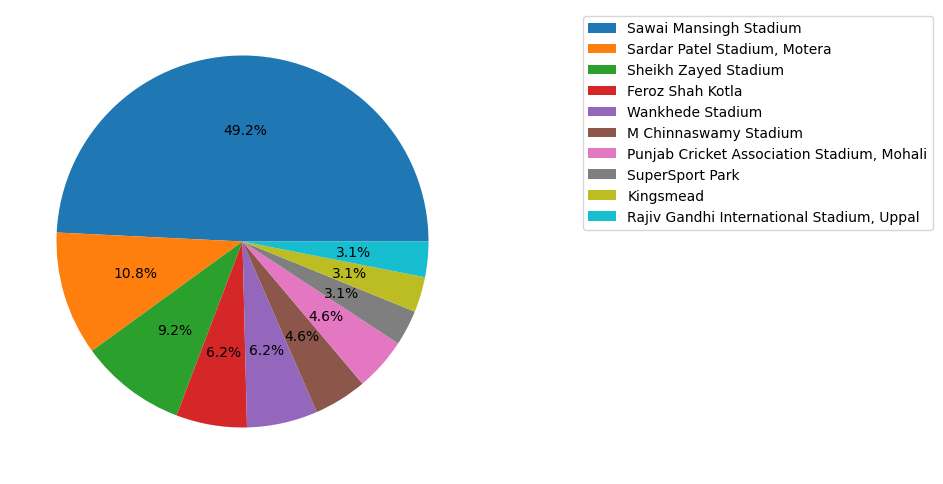

Winner:  Kings XI Punjab


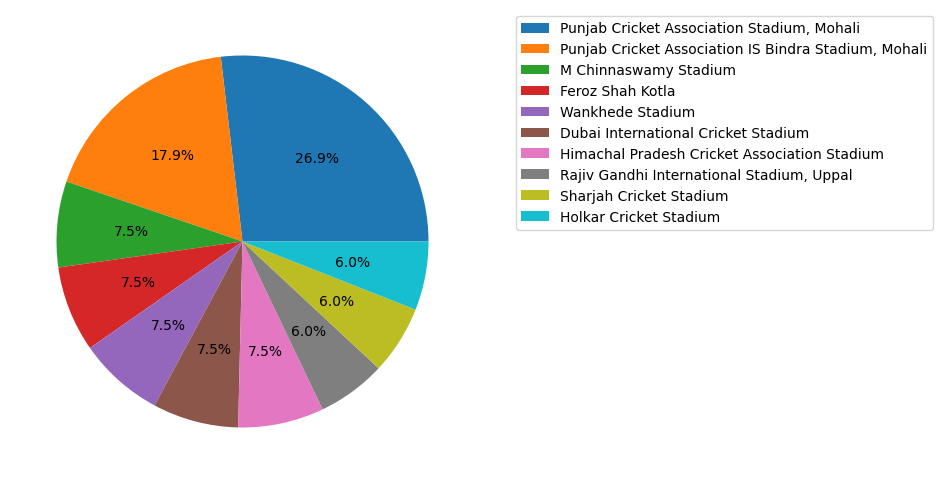

Winner:  Deccan Chargers


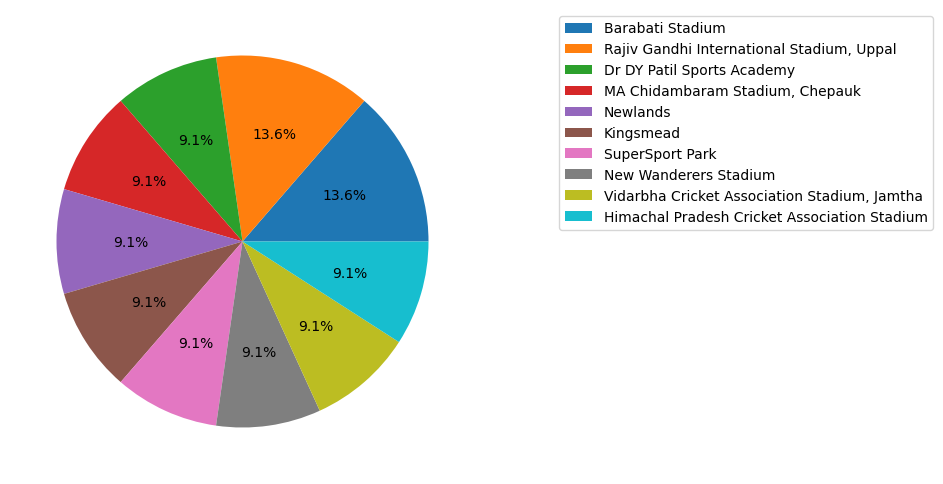

Winner:  Mumbai Indians


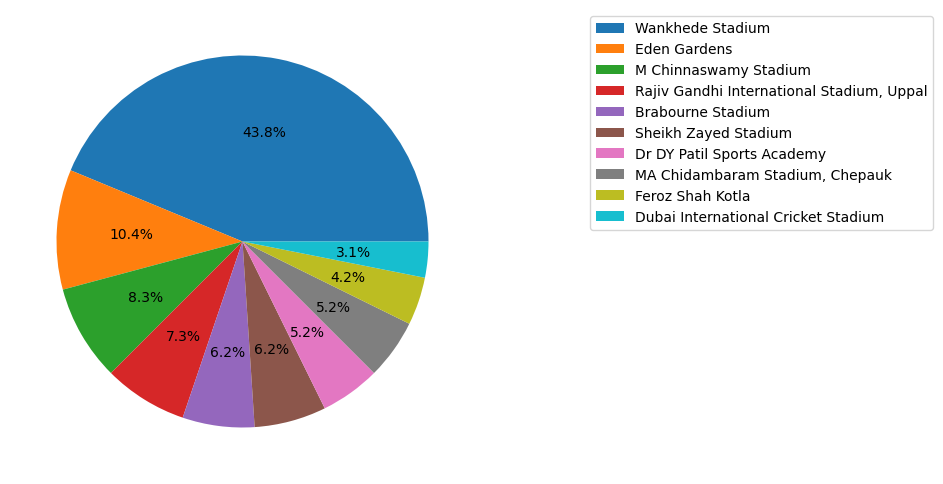

Winner:  Pune Warriors


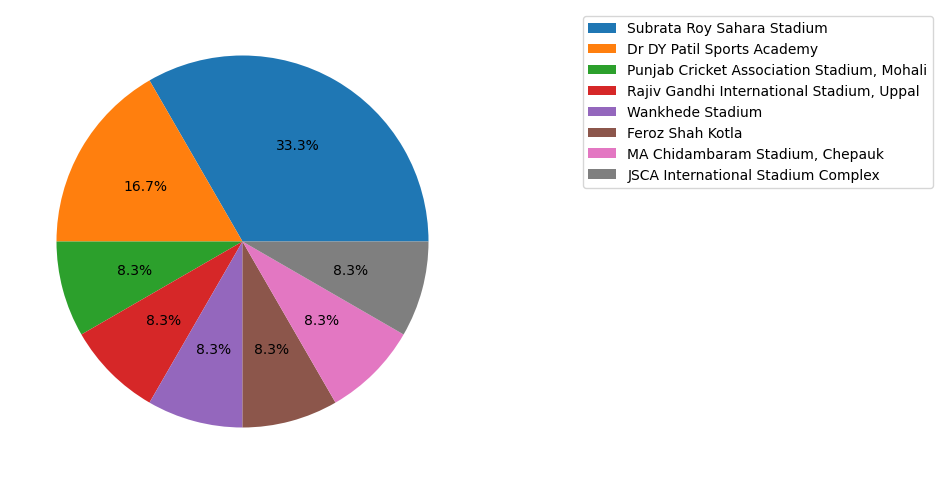

Winner:  Kochi Tuskers Kerala


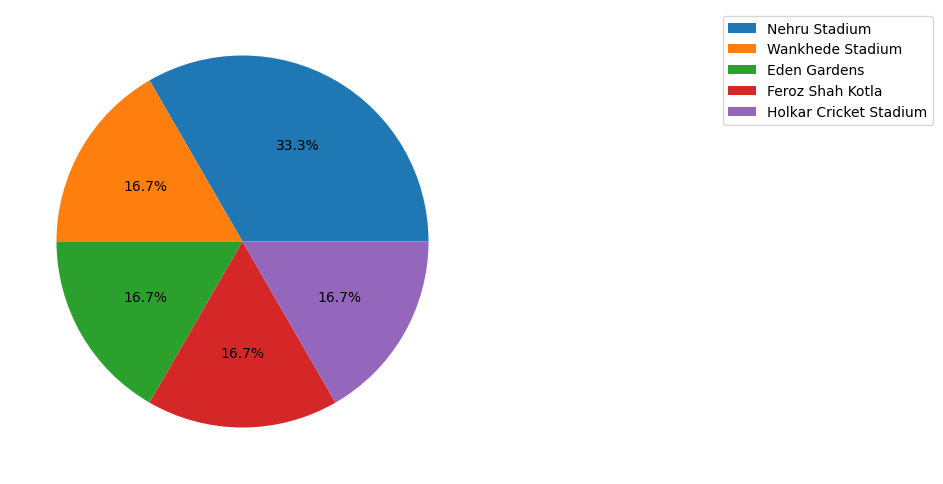

Winner:  Sunrisers Hyderabad


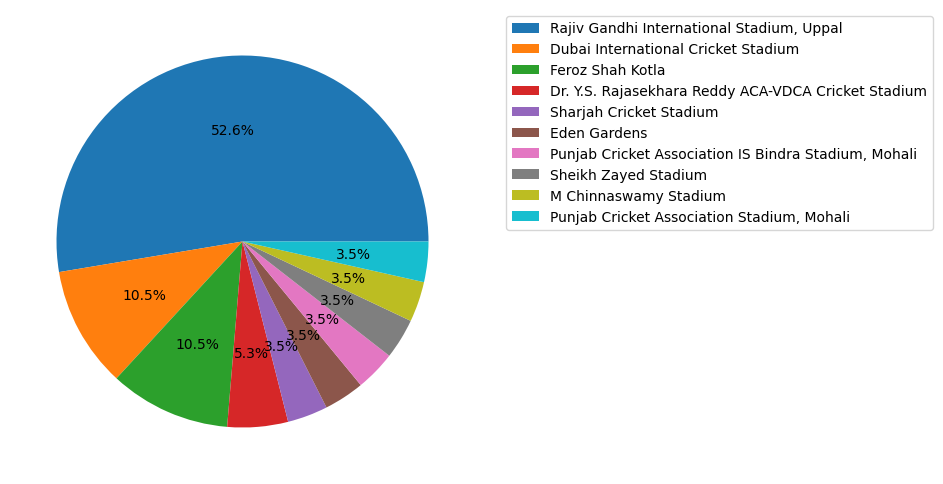

Winner:  Rising Pune Supergiants


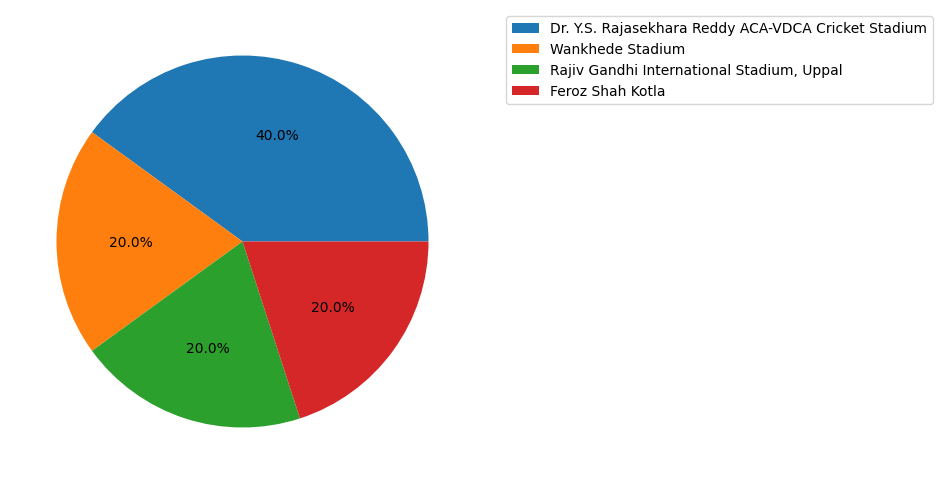

Winner:  Gujarat Lions


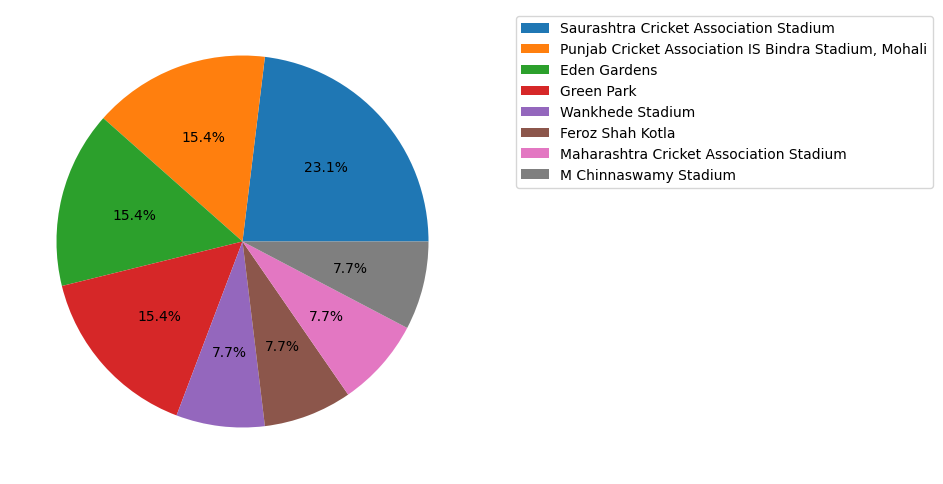

Winner:  Rising Pune Supergiant


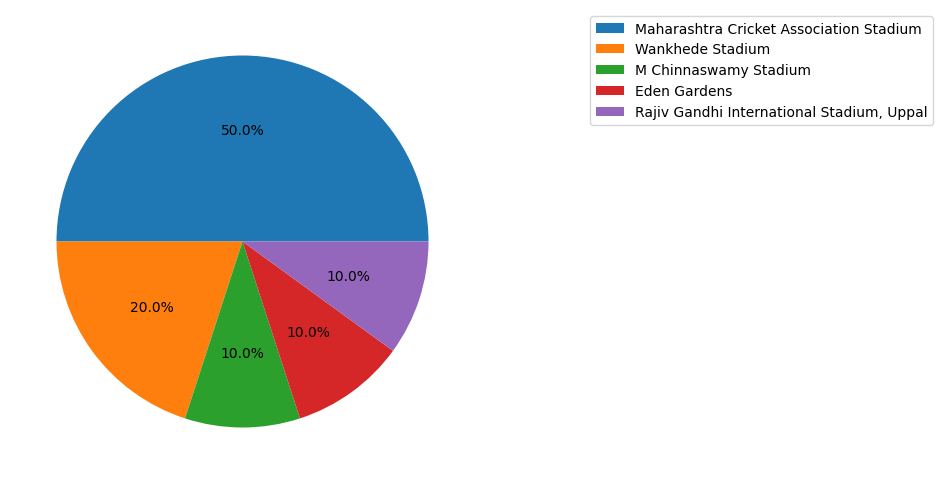

Winner:  Delhi Capitals


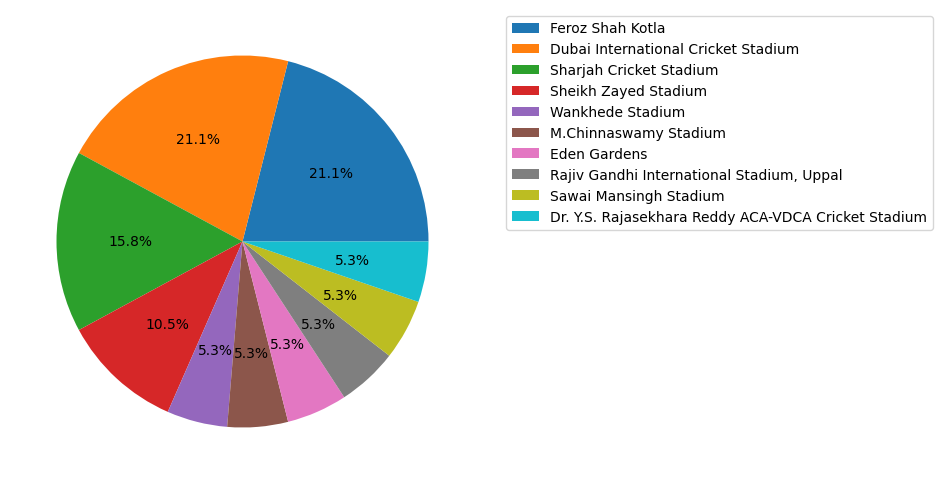

In [54]:
for i in df["winner"].unique():  
  print("Winner: ", i)
  plt.figure(figsize=(6,10))  
  plt.pie(df[df["winner"] == i]["venue"].value_counts()[:10], autopct = "%1.1f%%")
  plt.legend(df[df["winner"] == i]["venue"].value_counts()[:10].index, bbox_to_anchor = (2,1), loc = "upper right")
  plt.show()

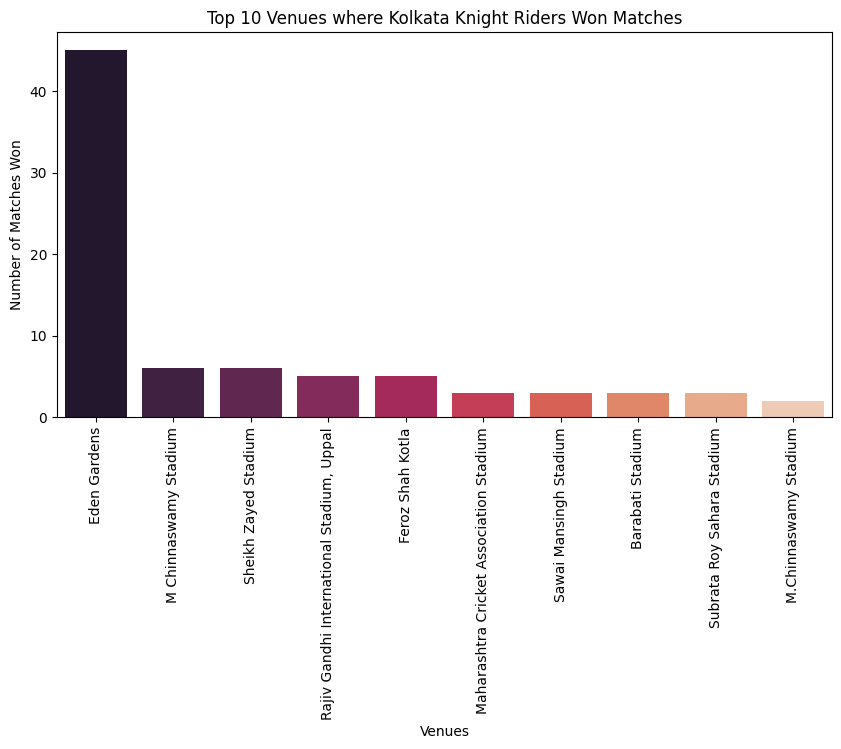

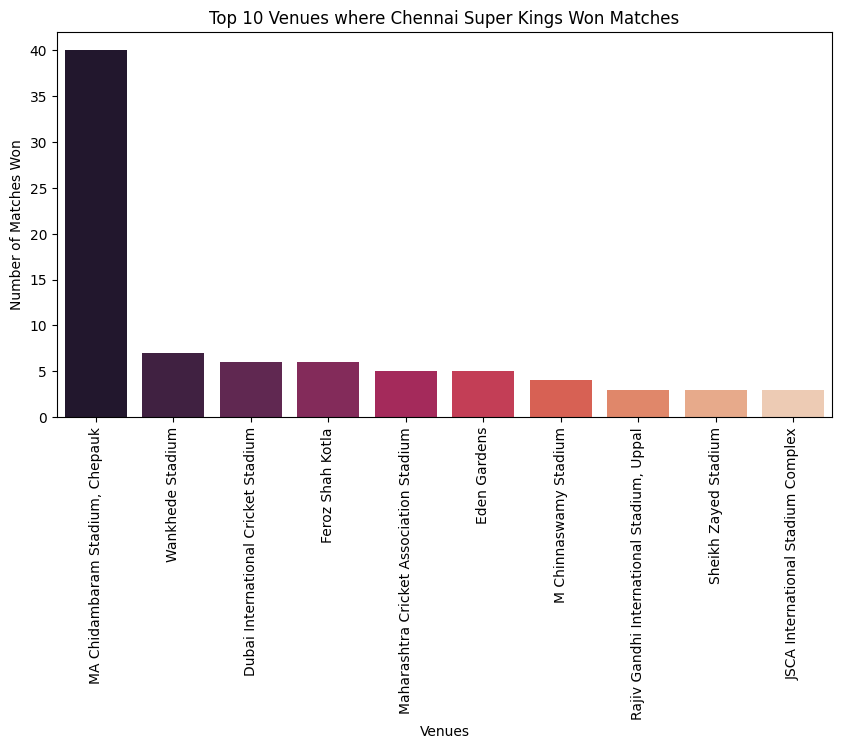

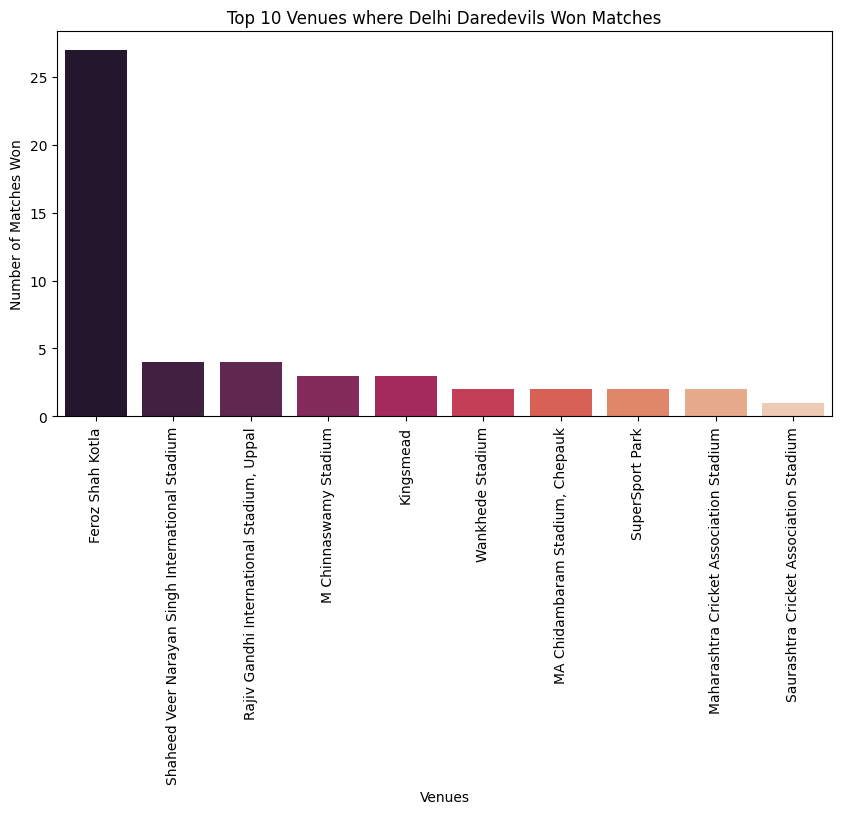

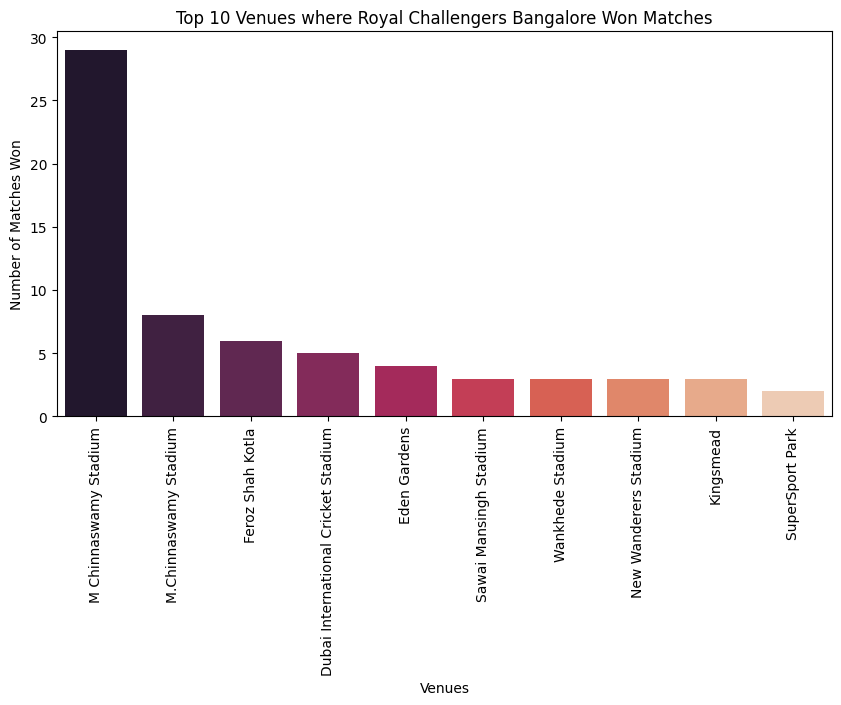

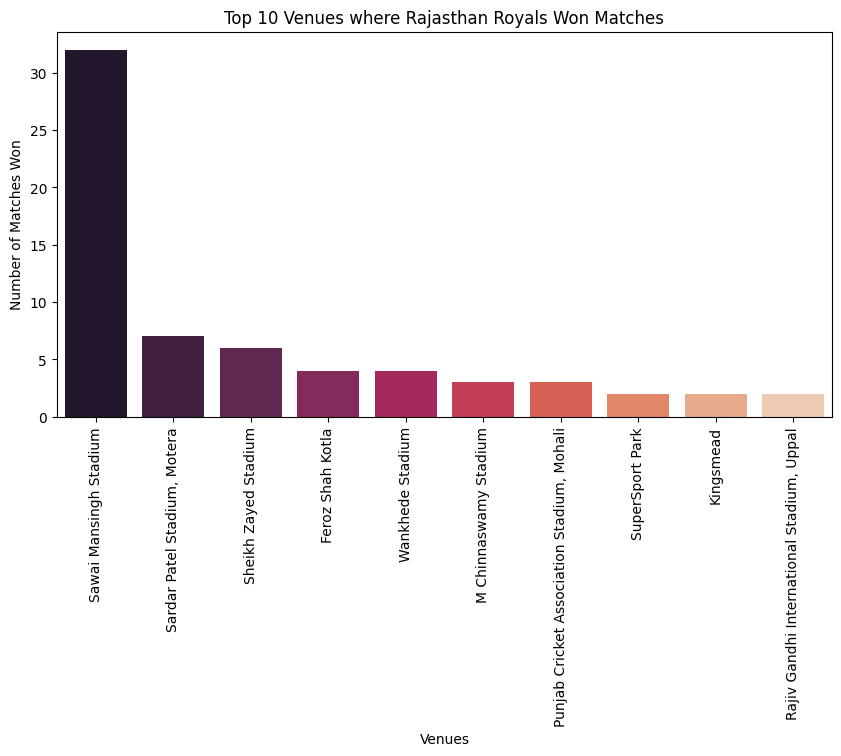

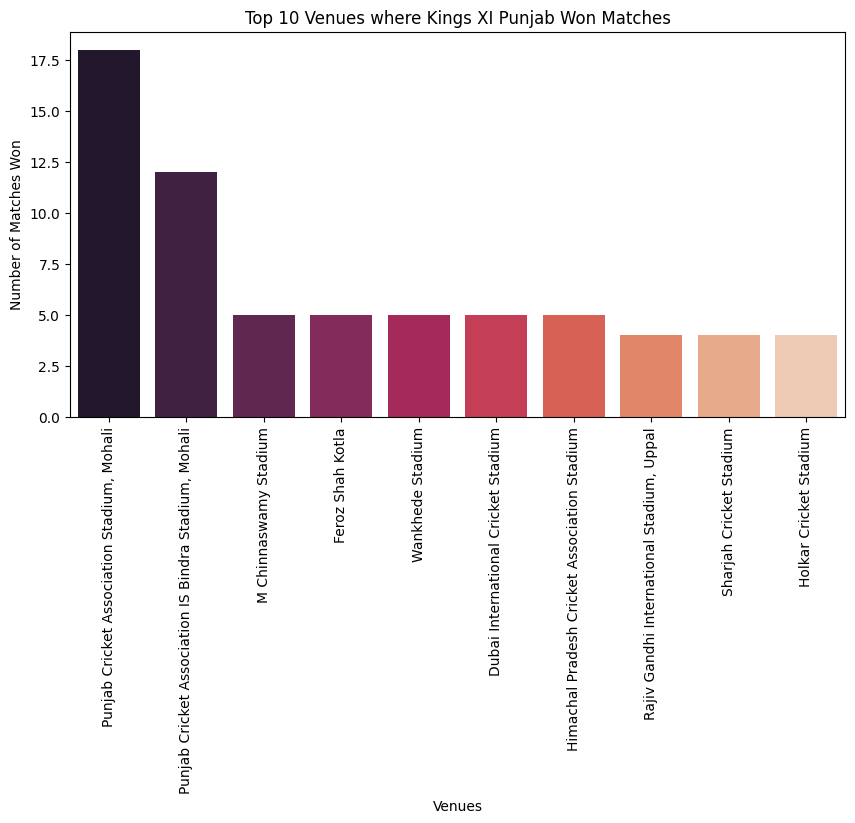

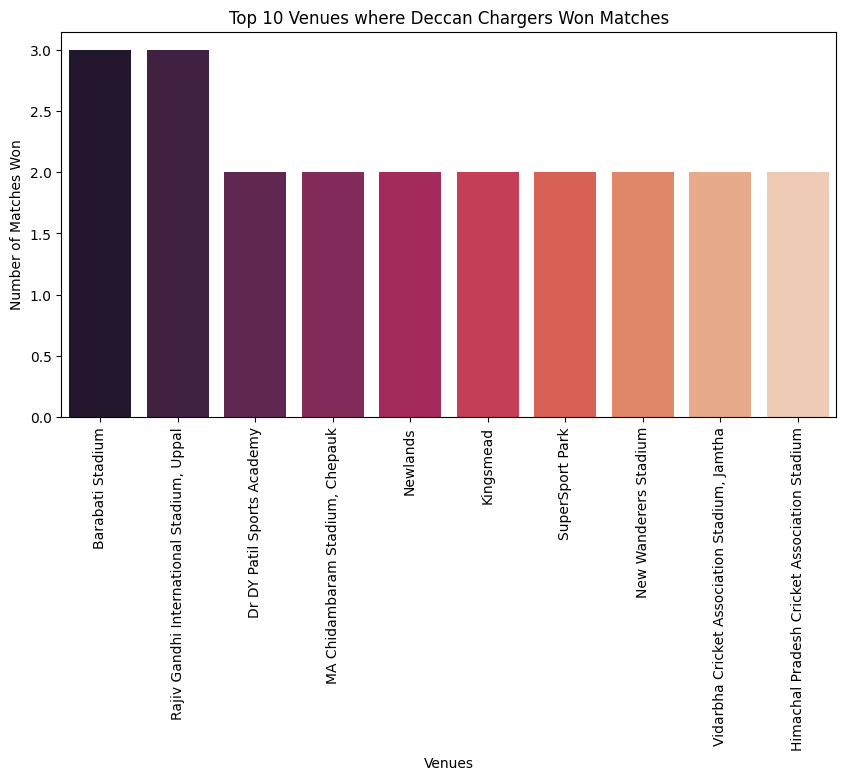

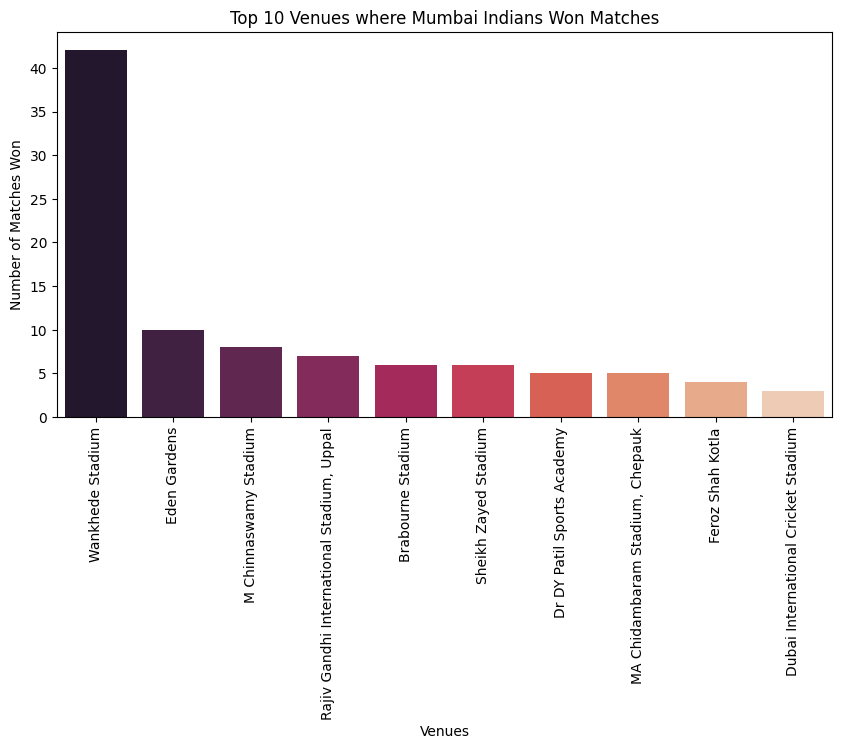

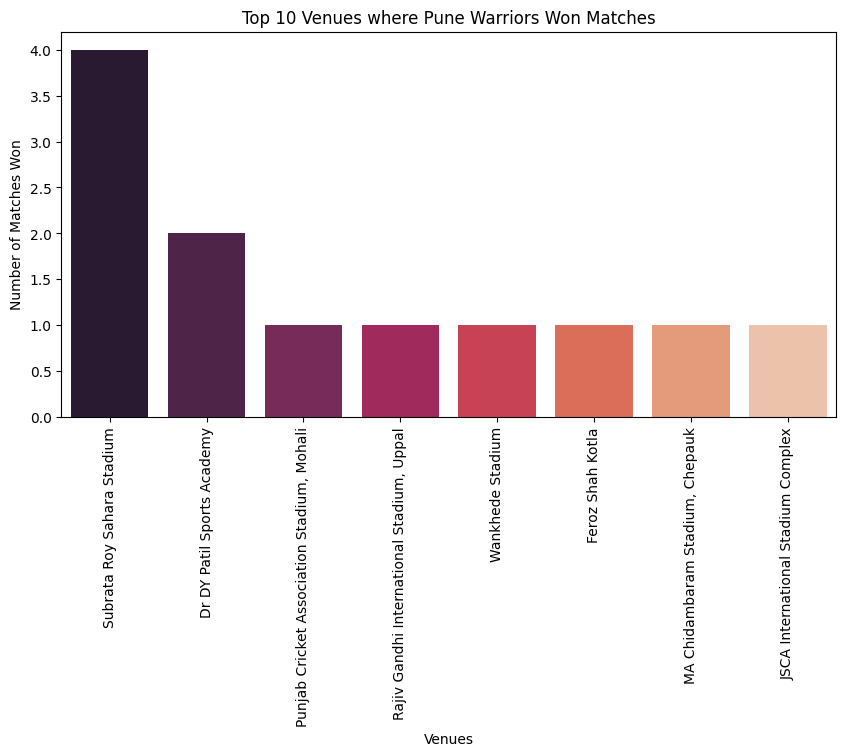

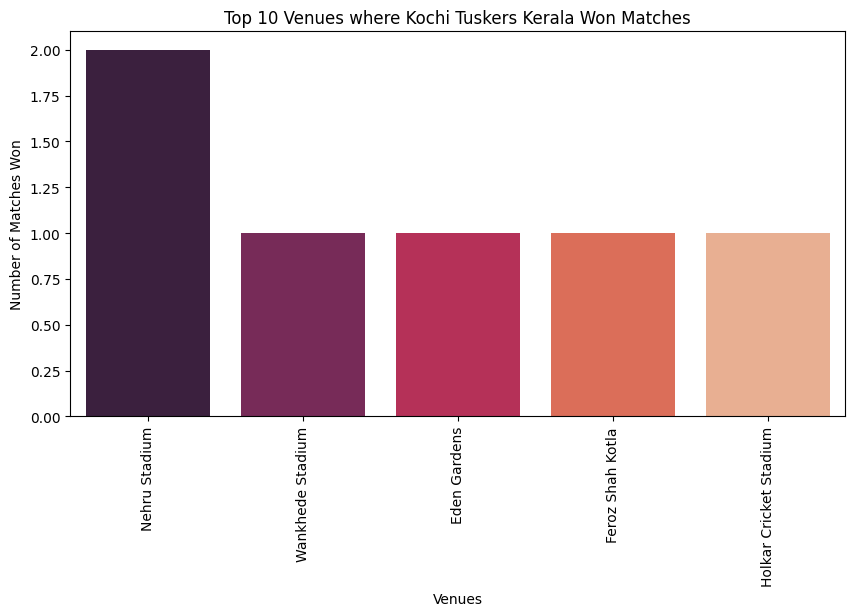

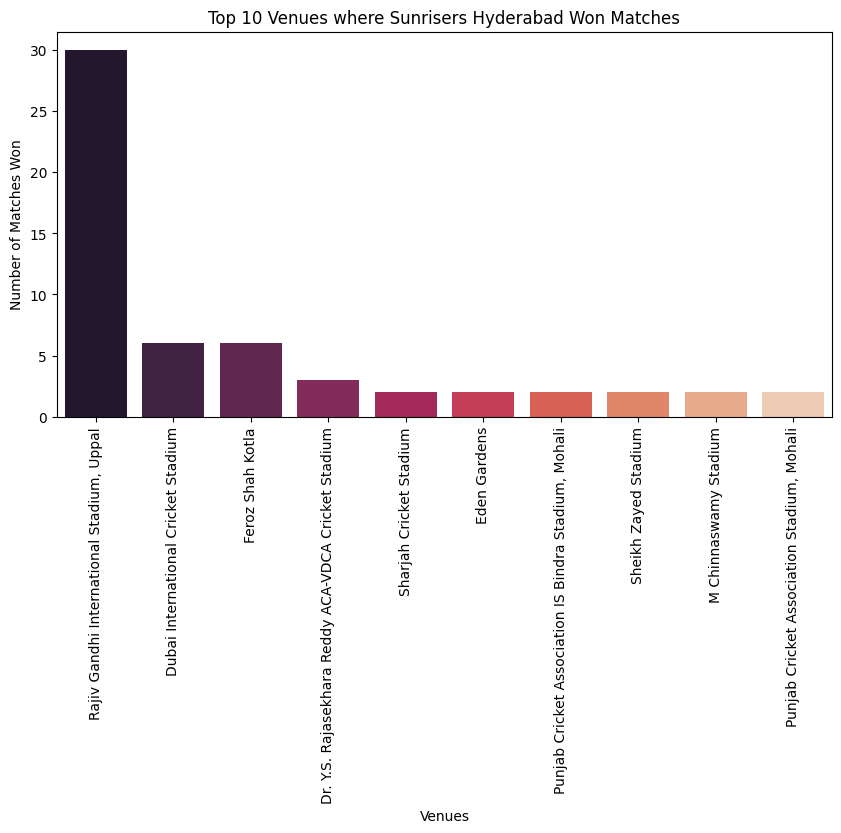

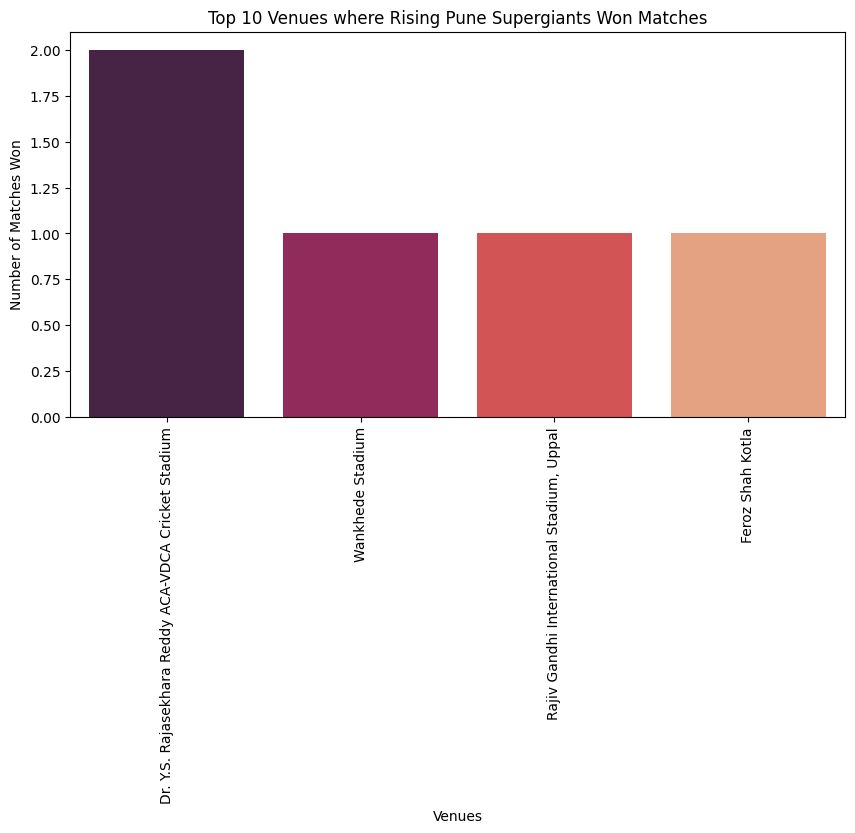

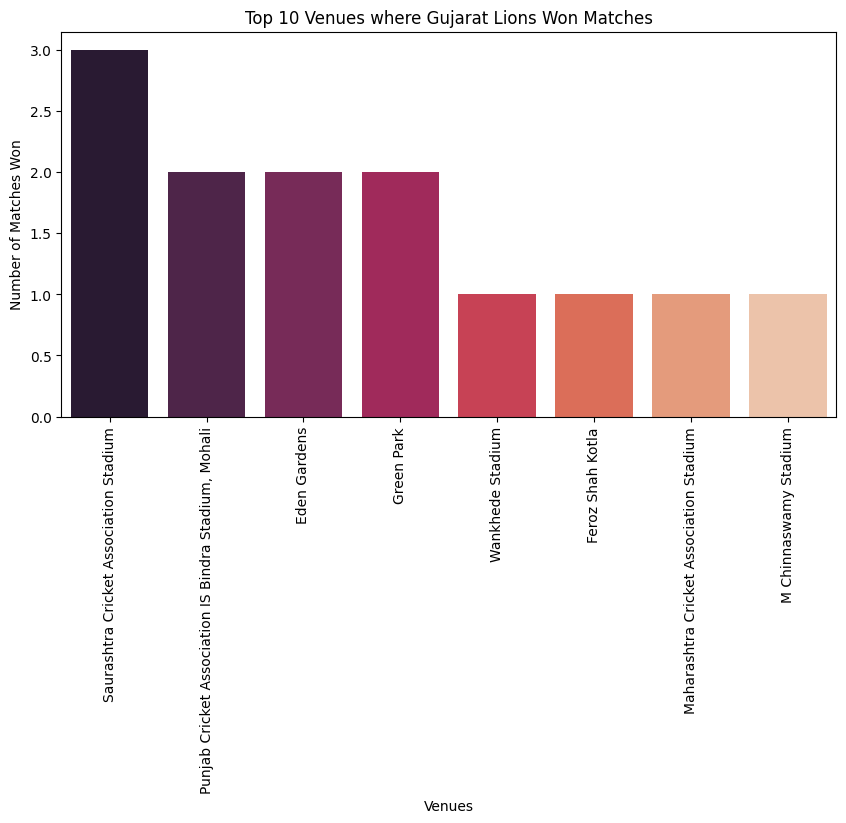

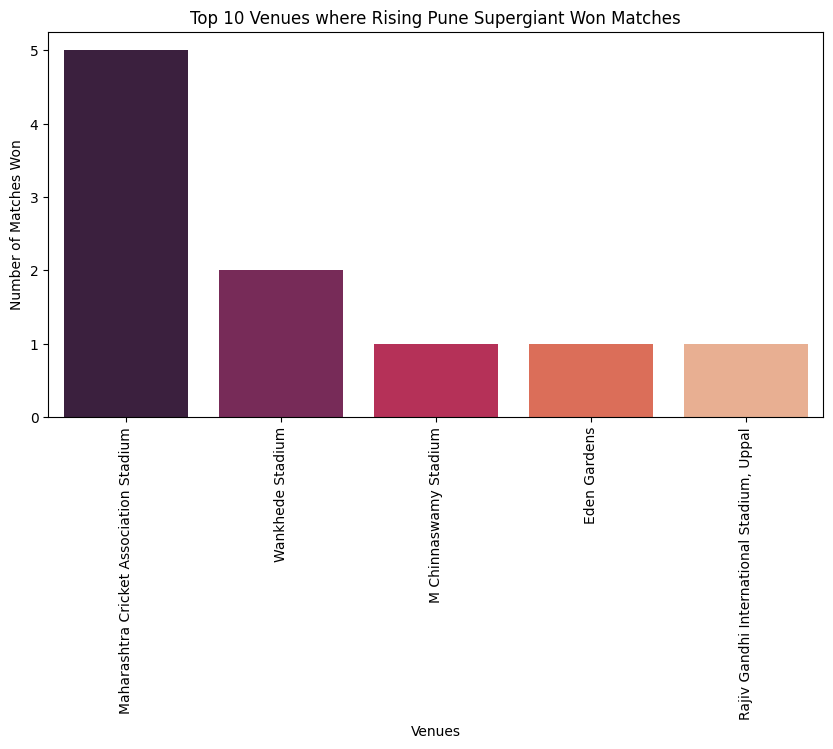

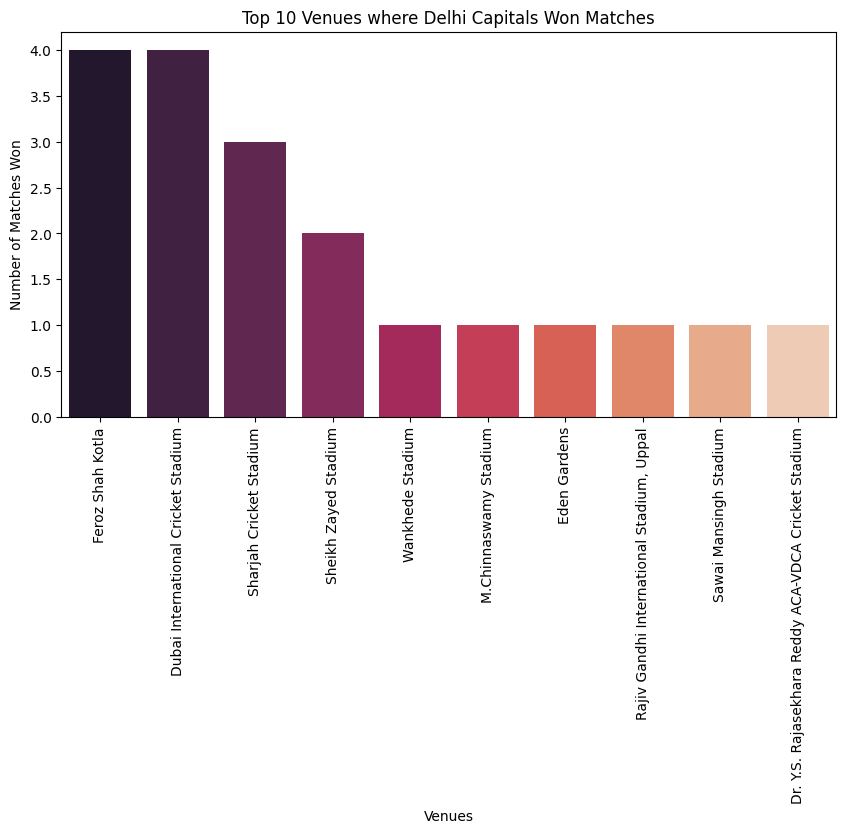

In [55]:
#BarPlots
for i in df["winner"].unique():
    plt.figure(figsize=(10,5))
    sns.barplot(x=df[df["winner"]==i]["venue"].value_counts()[:10].index,
                y=df[df["winner"]==i]["venue"].value_counts()[:10].values,
                palette="rocket")
    plt.xticks(rotation=90)
    plt.xlabel("Venues")
    plt.ylabel("Number of Matches Won")
    plt.title("Top 10 Venues where {} Won Matches".format(i))
    plt.show()

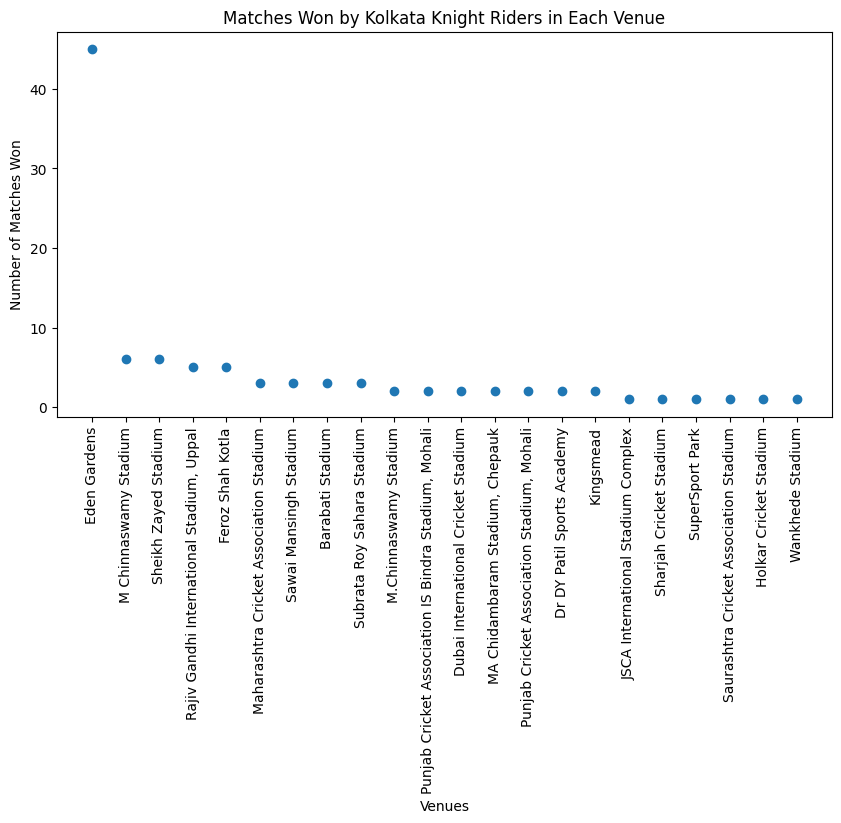

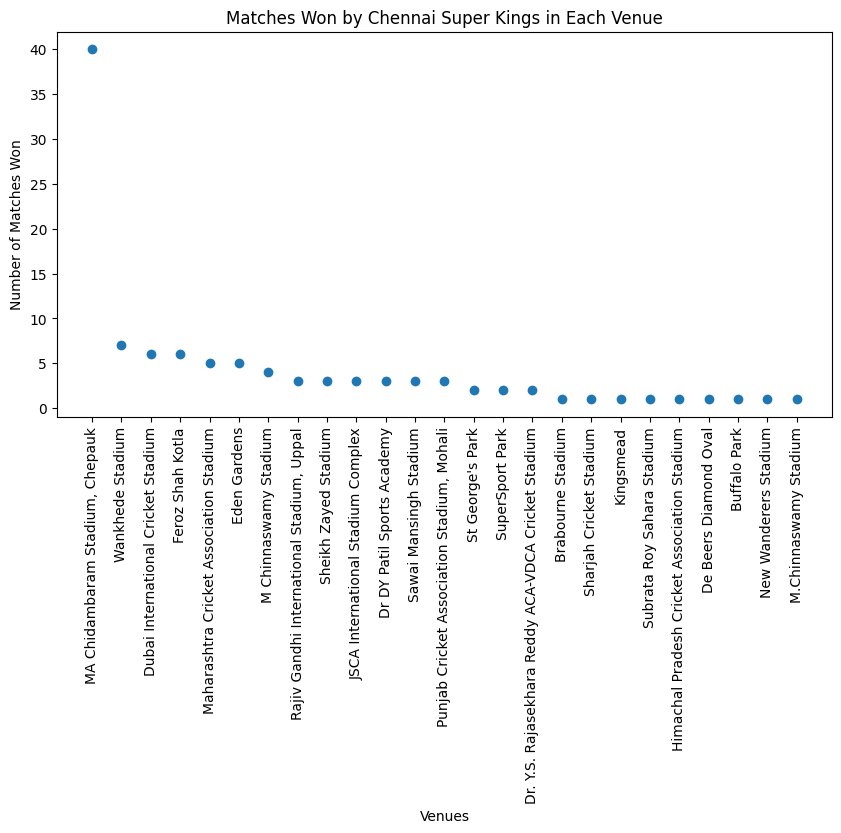

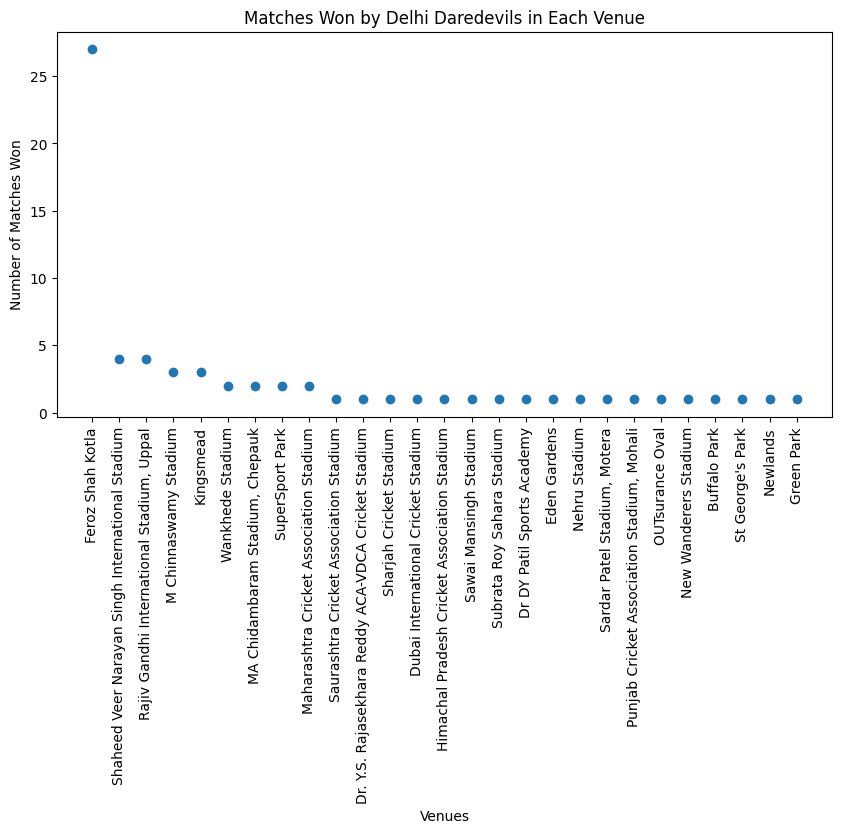

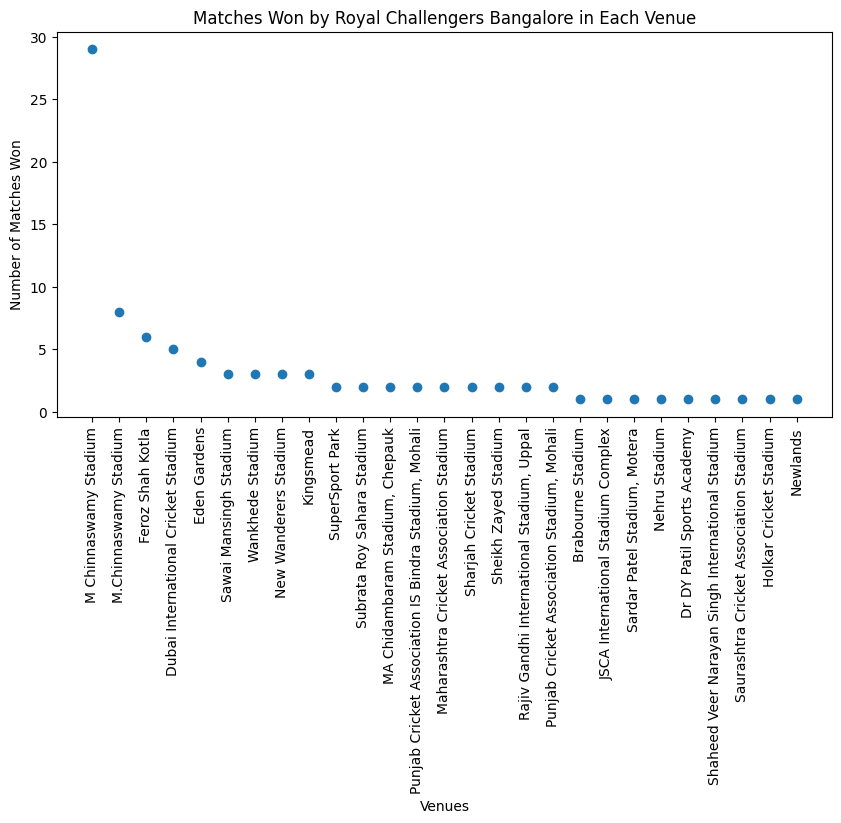

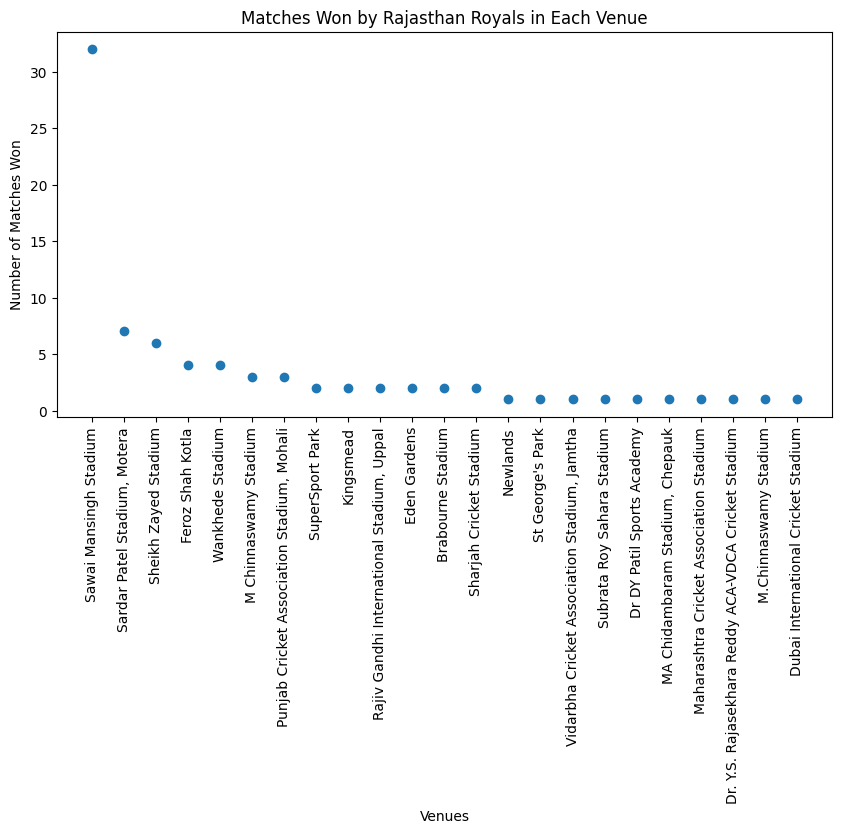

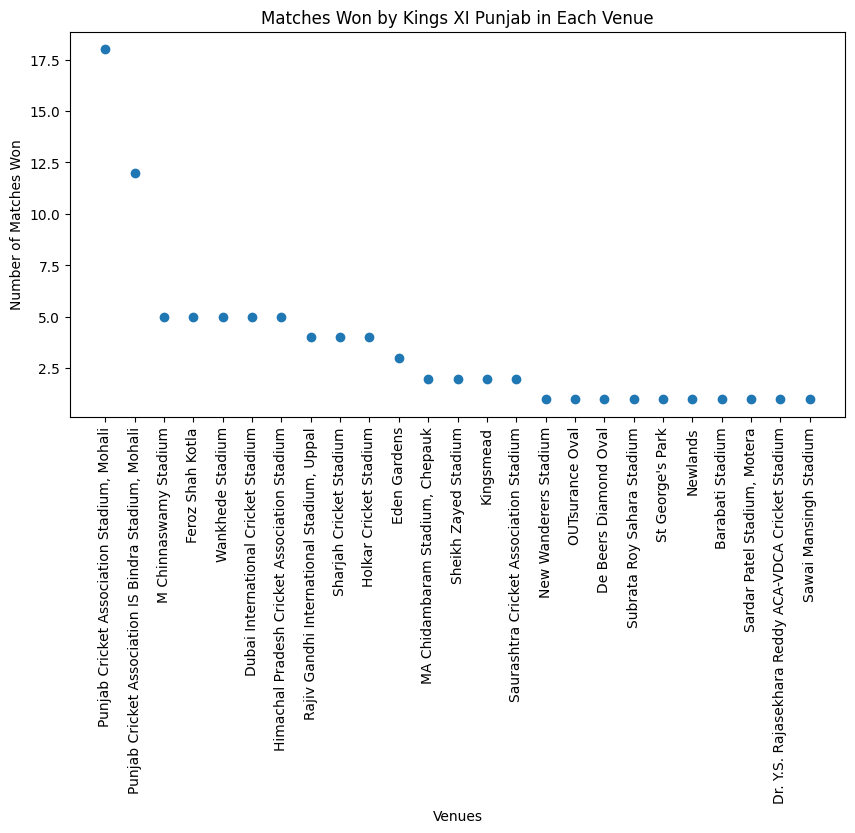

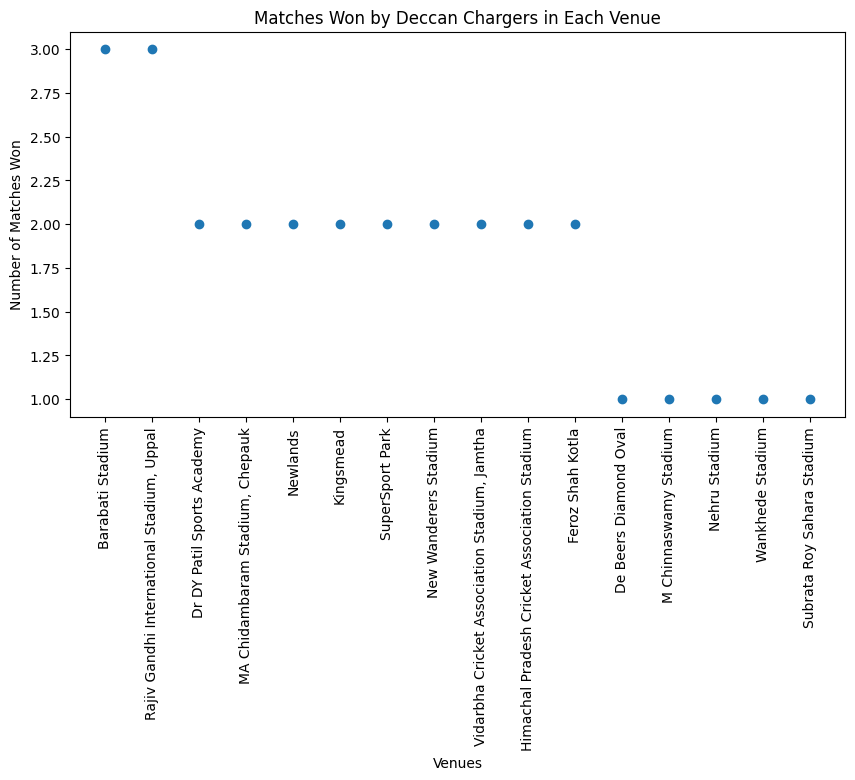

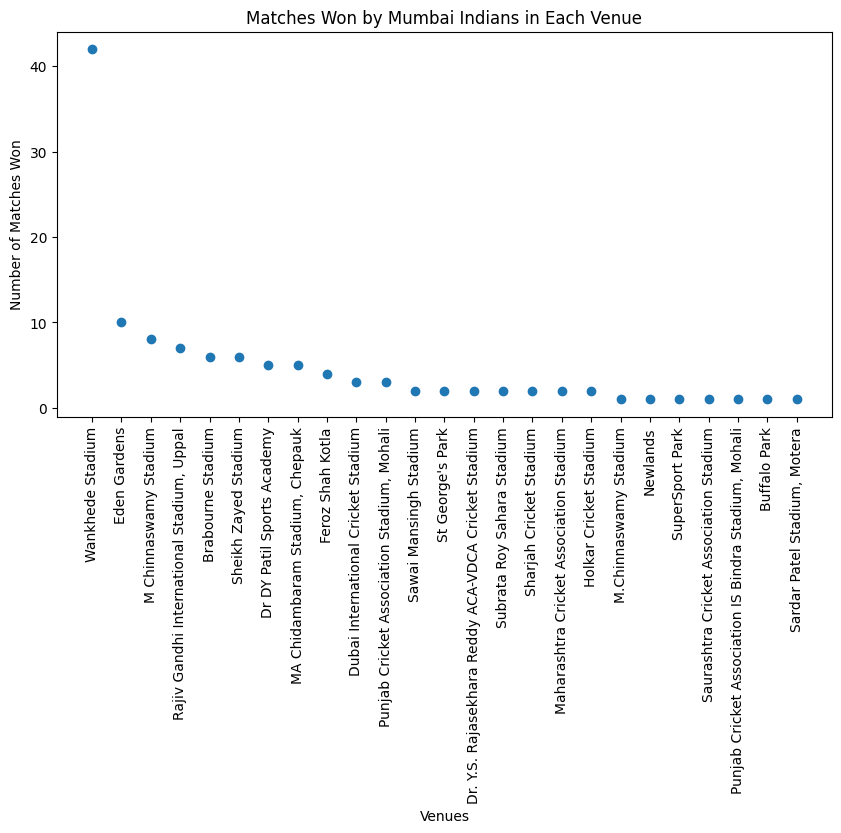

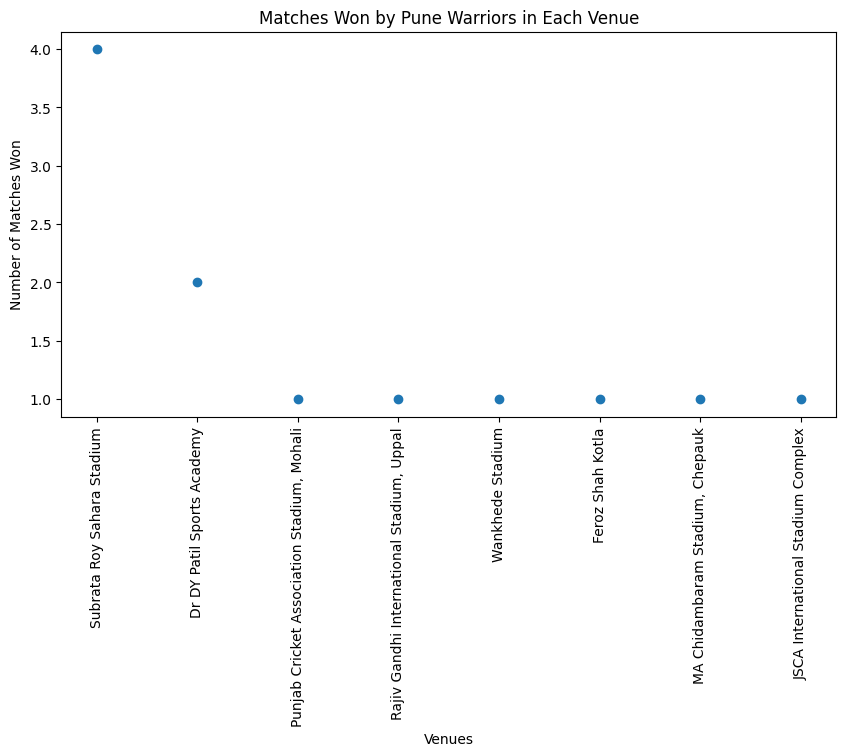

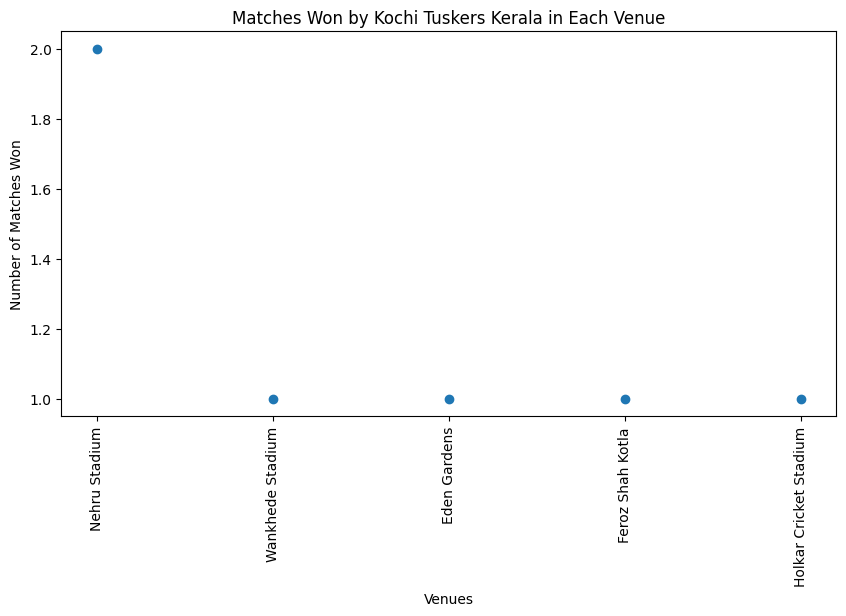

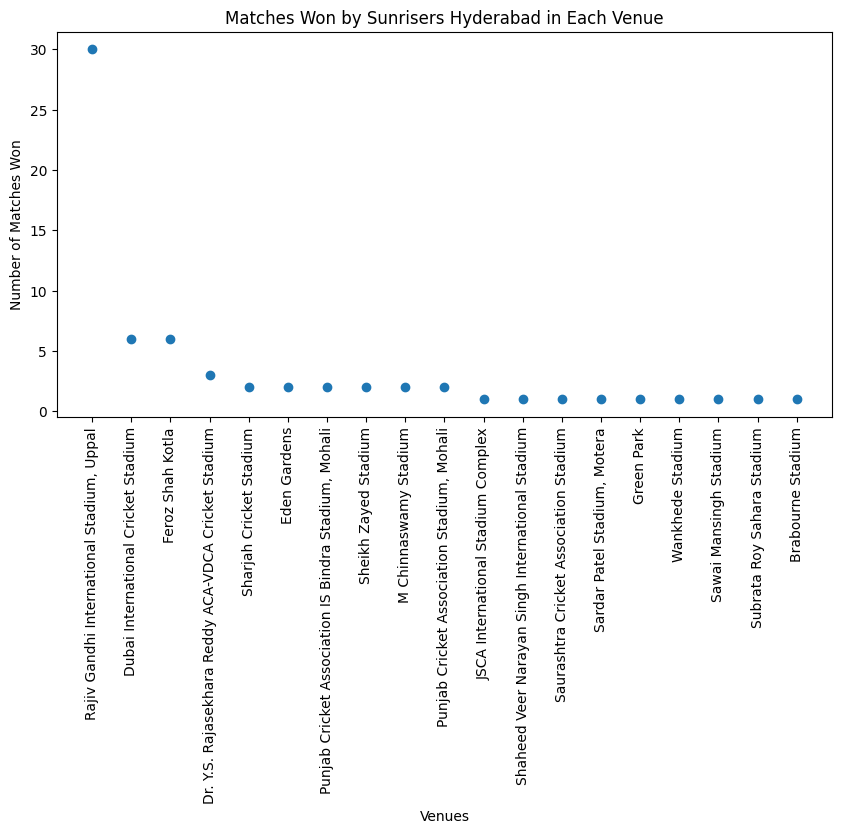

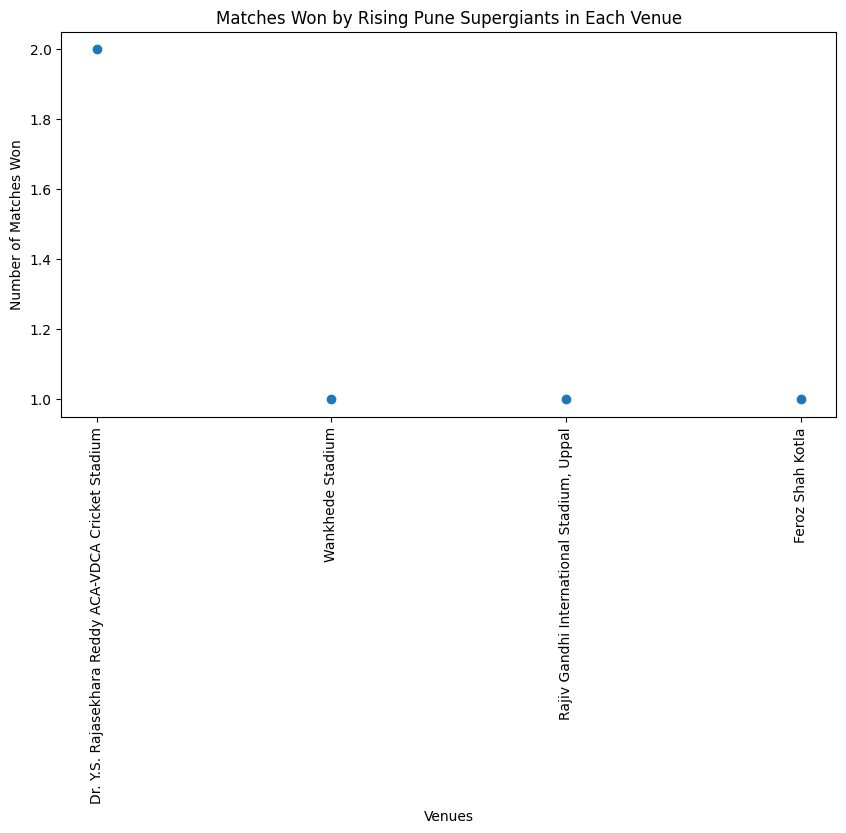

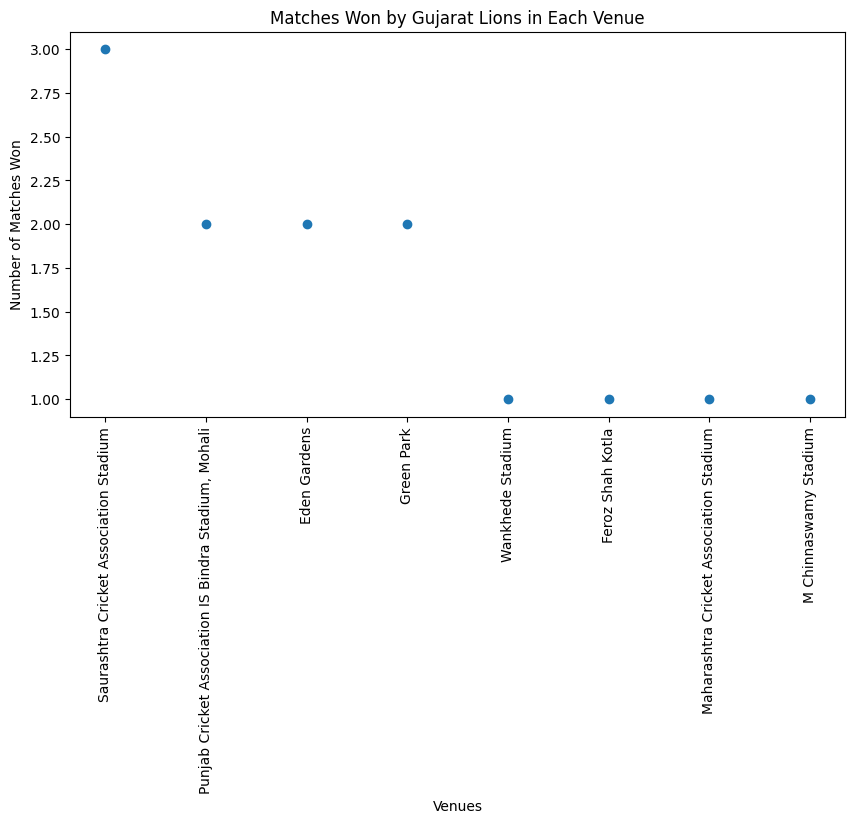

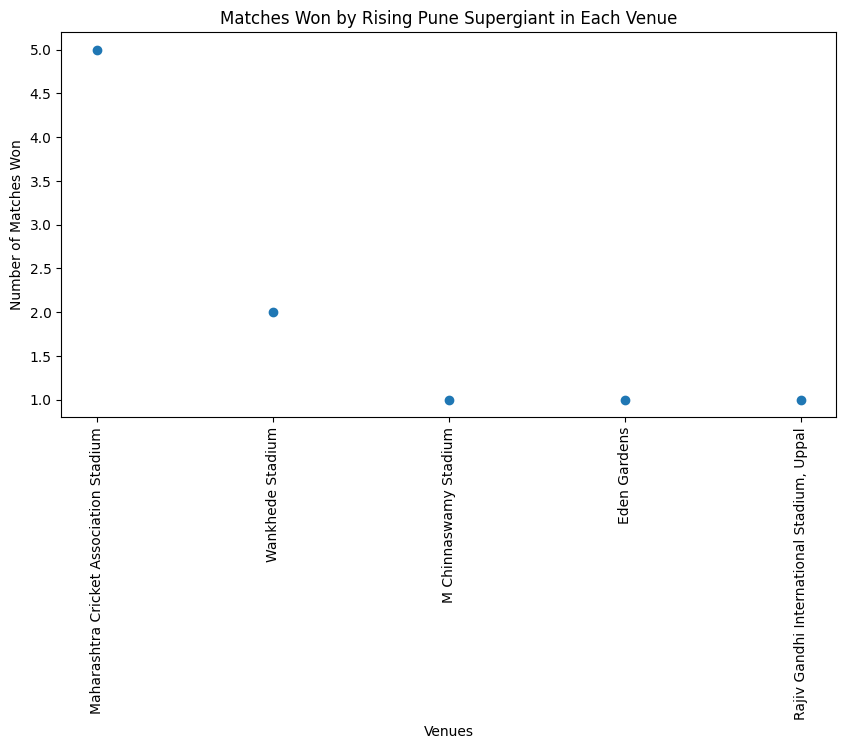

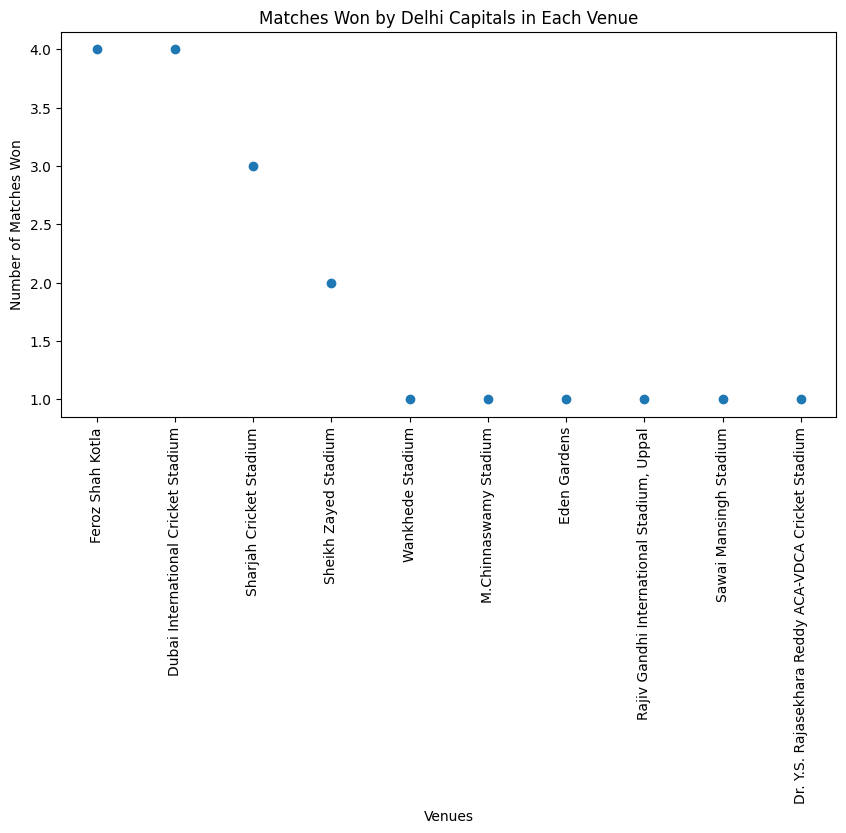

In [56]:
#ScatterPlots
for i in df["winner"].unique():
    venue_counts = df[df["winner"]==i]["venue"].value_counts()
    matches_won = venue_counts.values
    venues = venue_counts.index
    plt.figure(figsize=(10,5))
    plt.scatter(x=venues, y=matches_won)
    plt.xticks(rotation=90)
    plt.xlabel("Venues")
    plt.ylabel("Number of Matches Won")
    plt.title("Matches Won by {} in Each Venue".format(i))
    plt.show()

Succesfull Team with most Tosses won

In [57]:
#Succesfull Team with most Tosses won
df.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     86
Rajasthan Royals                85
Kings XI Punjab                 85
Delhi Daredevils                79
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

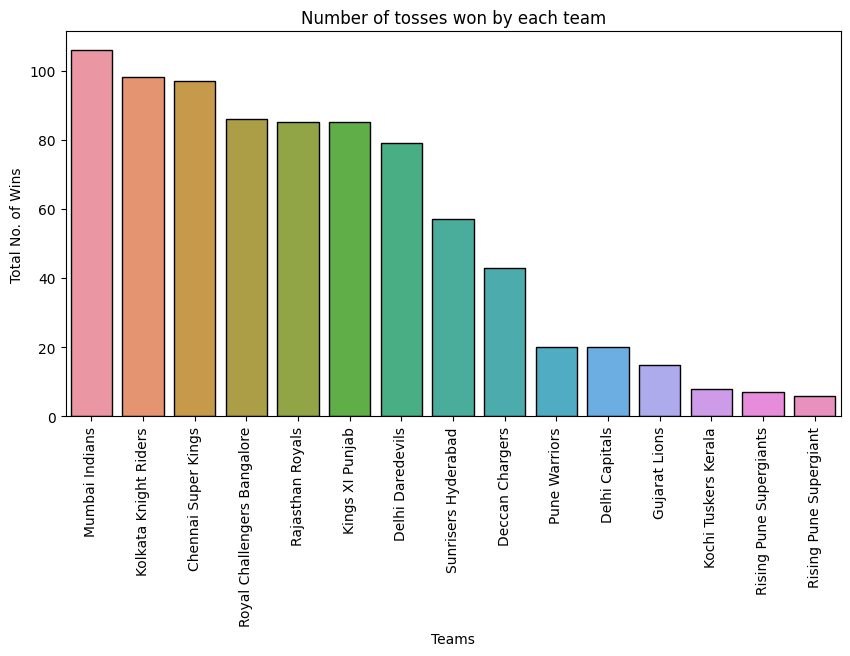

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.toss_winner.value_counts().index, y=df.toss_winner.value_counts(), edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total No. of Wins")
plt.title("Number of tosses won by each team")
plt.show()


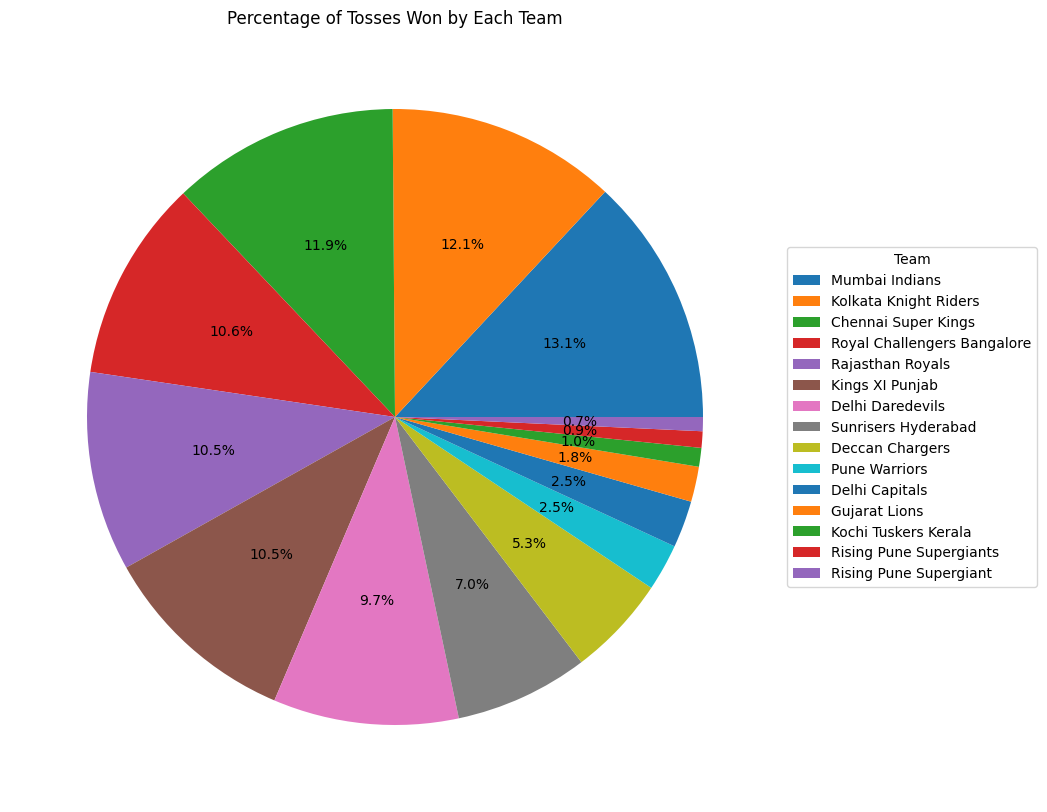

In [59]:
toss_wins = df['toss_winner'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(toss_wins.values, autopct='%1.1f%%')
plt.title('Percentage of Tosses Won by Each Team')
plt.legend(title='Team', labels=toss_wins.index, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

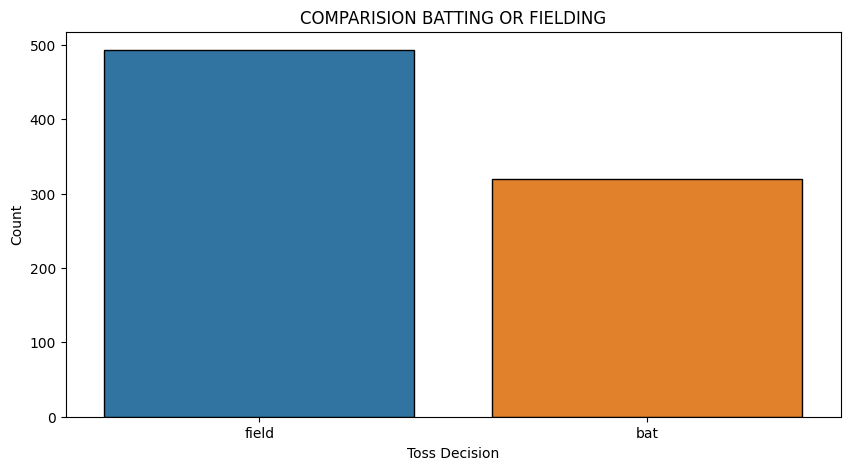

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(x=df["toss_decision"], edgecolor=('black'))
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("COMPARISION BATTING OR FIELDING")
plt.show()

Win percentage of team when the team elect to bat first:  45.45454545454545


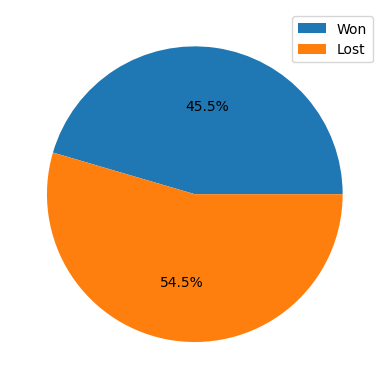

In [61]:
# When won the toss and elected to Bat first
x_bat_winner = len(df[(df["winner"]==df["toss_winner"]) & (df["toss_decision"]== "bat")])
y_bat = len(df[df["toss_decision"] == "bat"])
print("Win percentage of team when the team elect to bat first: ",x_bat_winner/y_bat*100)

plt.pie([x_bat_winner, y_bat -x_bat_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1))
plt.show()

Win percentage of team when the team elect to field first:  55.375253549695735


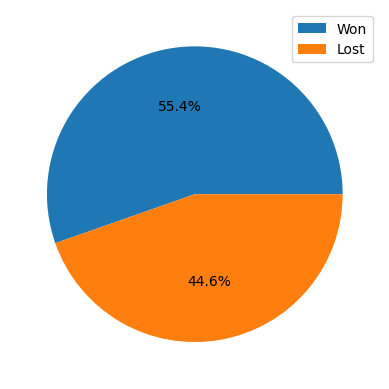

In [62]:
# When won the toss and elected to Field first
x_field_winner = len(df[(df["winner"]==df["toss_winner"]) & (df["toss_decision"]== "field")])
y_field = len(df[df["toss_decision"] == "field"])
print("Win percentage of team when the team elect to field first: ",x_field_winner/y_field*100)

plt.pie([x_field_winner, y_field - x_field_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1), loc = "upper right")
plt.show()

# Inference
* According to data set there are 812 matches played by 15 teams in 35 venues.
* Mumbai Indians has played more matches and won highest number of matches.
* Teams winning the toss has elected to field first maximum times than bat first.
* Teams winning toss has very little edge over the toss lossing team, but the team which win the toss and decides to field first has more probability to win the match.
* Chennai Super Kings has highest percentage of winning rate at home ground, that shows they analyze the ground conditions well and play with proper 11 players.
* Teams have more proportion of winning matches when they play at their home ground.
* Ab de Villiers has won highest number of player of the match awards.

--------------------THANK YOU!--------------------